In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

<AxesSubplot:title={'center':'한글'}>

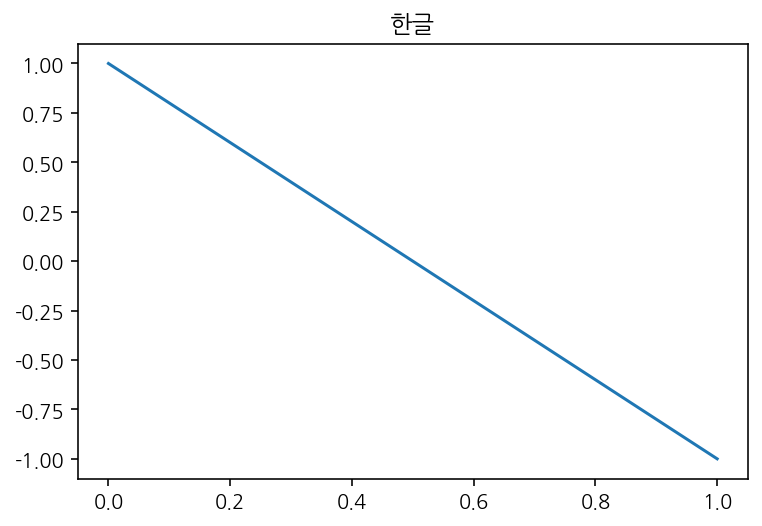

In [2]:
import koreanize_matplotlib

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

pd.Series([1,-1]).plot(title="한글")

In [3]:
from glob import glob

file_name = glob("Data/성*")[0]
file_name

'Data\\성_및_연령별_추계인구_1세별__5세별__시도_20221016114632.xlsx'

In [4]:
pd.options.display.max_columns = None

In [5]:
인구df =  pd.read_excel(file_name)
인구df.shape

c:\Users\chjy1\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


(1242, 5)

In [6]:
인구df.head()

,시나리오별(1),시도별(1),성별(1),연령별(1),2020
0,중위 추계(기본 추계: 출산율-중위 / 기대수명-중위 / 국제이동-중위 / 국내이동...,전국,계,계,51836239.0
1,중위 추계(기본 추계: 출산율-중위 / 기대수명-중위 / 국제이동-중위 / 국내이동...,전국,계,0 - 4세,1776616.0
2,중위 추계(기본 추계: 출산율-중위 / 기대수명-중위 / 국제이동-중위 / 국내이동...,전국,계,5 - 9세,2278285.0
3,중위 추계(기본 추계: 출산율-중위 / 기대수명-중위 / 국제이동-중위 / 국내이동...,전국,계,10 - 14세,2250969.0
4,중위 추계(기본 추계: 출산율-중위 / 기대수명-중위 / 국제이동-중위 / 국내이동...,전국,계,15 - 19세,2518218.0


In [7]:
인구df = 인구df.drop(columns=["시나리오별(1)"])
인구df

,시도별(1),성별(1),연령별(1),2020
0,전국,계,계,51836239.0
1,전국,계,0 - 4세,1776616.0
2,전국,계,5 - 9세,2278285.0
3,전국,계,10 - 14세,2250969.0
4,전국,계,15 - 19세,2518218.0
...,...,...,...,...
1237,제주특별자치도,여자,80 - 84세,9200.0
1238,제주특별자치도,여자,85 - 89세,6097.0
1239,제주특별자치도,여자,90 - 94세,2314.0
1240,제주특별자치도,여자,95 - 99세,846.0


In [8]:
인구df = 인구df.rename(columns={"시도별(1)":"시도명", "성별(1)" : "성별", "연령별(1)" : "연령대" ,"2020":"인구"})
인구df

,시도명,성별,연령대,인구
0,전국,계,계,51836239.0
1,전국,계,0 - 4세,1776616.0
2,전국,계,5 - 9세,2278285.0
3,전국,계,10 - 14세,2250969.0
4,전국,계,15 - 19세,2518218.0
...,...,...,...,...
1237,제주특별자치도,여자,80 - 84세,9200.0
1238,제주특별자치도,여자,85 - 89세,6097.0
1239,제주특별자치도,여자,90 - 94세,2314.0
1240,제주특별자치도,여자,95 - 99세,846.0


In [9]:
인구df["성별"] = 인구df["성별"].replace("계", "전체")
인구df

,시도명,성별,연령대,인구
0,전국,전체,계,51836239.0
1,전국,전체,0 - 4세,1776616.0
2,전국,전체,5 - 9세,2278285.0
3,전국,전체,10 - 14세,2250969.0
4,전국,전체,15 - 19세,2518218.0
...,...,...,...,...
1237,제주특별자치도,여자,80 - 84세,9200.0
1238,제주특별자치도,여자,85 - 89세,6097.0
1239,제주특별자치도,여자,90 - 94세,2314.0
1240,제주특별자치도,여자,95 - 99세,846.0


In [10]:
인구df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1242 entries, 0 to 1241
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시도명     1242 non-null   object 
 1   성별      1242 non-null   object 
 2   연령대     1242 non-null   object 
 3   인구      1242 non-null   float64
dtypes: float64(1), object(3)
memory usage: 38.9+ KB


## 전국의 연령대별 인구 추출및 전처리하기

In [11]:
전국인구df =  인구df.loc[(인구df["시도명"] == "전국") & (인구df["성별"] == "전체")]
전국인구df

,시도명,성별,연령대,인구
0,전국,전체,계,51836239.0
1,전국,전체,0 - 4세,1776616.0
2,전국,전체,5 - 9세,2278285.0
3,전국,전체,10 - 14세,2250969.0
4,전국,전체,15 - 19세,2518218.0
5,전국,전체,20 - 24세,3392351.0
6,전국,전체,25 - 29세,3645542.0
7,전국,전체,30 - 34세,3307803.0
8,전국,전체,35 - 39세,3866979.0
9,전국,전체,40 - 44세,3872171.0


In [12]:
# 컬럼정리
전국인구df = 전국인구df.drop(columns=["성별", "시도명"])

In [13]:
전국인구df["연령대"] = 전국인구df["연령대"].str.replace(" - ", "~")
전국인구df["연령대"] 

0           계
1        0~4세
2        5~9세
3      10~14세
4      15~19세
5      20~24세
6      25~29세
7      30~34세
8      35~39세
9      40~44세
10     45~49세
11     50~54세
12     55~59세
13     60~64세
14     65~69세
15     70~74세
16     75~79세
17      80세이상
18     80~84세
19     85~89세
20     90~94세
21     95~99세
22    100세 이상
Name: 연령대, dtype: object

In [14]:
# 85세 이상의 총인구 구하기
전국인구df.iloc[-4:]["인구"].sum()

781582.0

In [19]:
전국인구df = 전국인구df.append({"연령대":"85세+", "인구":전국인구df.iloc[-4:]["인구"].sum()}, ignore_index=True)
전국인구df

C:\Users\chjy1\AppData\Local\Temp\ipykernel_5800\4210324007.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  전국인구df = 전국인구df.append({"연령대":"85세+", "인구":전국인구df.iloc[-4:]["인구"].sum()}, ignore_index=True)


,연령대,인구
0,계,51836239.0
1,0~4세,1776616.0
2,5~9세,2278285.0
3,10~14세,2250969.0
4,15~19세,2518218.0
5,20~24세,3392351.0
6,25~29세,3645542.0
7,30~34세,3307803.0
8,35~39세,3866979.0
9,40~44세,3872171.0


In [21]:
# 데이터 형태 동일하게 맞춰주기
전국인구df["연령대"] = 전국인구df["연령대"].replace({"0~4세":"00~04세", "5~9세" : "05~09세"})
전국인구df

,연령대,인구
0,계,51836239.0
1,00~04세,1776616.0
2,05~09세,2278285.0
3,10~14세,2250969.0
4,15~19세,2518218.0
5,20~24세,3392351.0
6,25~29세,3645542.0
7,30~34세,3307803.0
8,35~39세,3866979.0
9,40~44세,3872171.0


### 처방정보데이터 불러오기

In [26]:
sample_file = glob("Data/sample*.csv")[0]
df = pd.read_csv(sample_file)
df.head(2)

,기준년도,가입자 일련번호,처방내역일련번호,일련번호,성별코드,연령대코드(5세단위),시도코드,요양개시일자,약품일반성분명코드,1회 투약량,1일투약량,총투여일수,단가,금액,일,월,요일,요일명,시도명,연령대,성별,투여코드,제형코드,제형
0,2020,666716,8178263,1,2,8,43,2020-07-02,194101ATB,2.0,2,5,73.0,1460,2,7,3,목,충청북도,35~39세,여자,내복제,TB,"정제, 저작정"
1,2020,666716,10897425,1,2,8,43,2020-05-28,186101ATB,1.0,3,3,125.0,1125,28,5,3,목,충청북도,35~39세,여자,내복제,TB,"정제, 저작정"


### 처방정보데이터에서 연령대별 처방횟수 데이터에 연령대별 인구데이터를 더해준다

In [27]:
연령별처방df = df.groupby("연령대")[["처방내역일련번호"]].count().merge(전국인구df, on="연령대")
연령별처방df

,연령대,처방내역일련번호,인구
0,00~04세,18426,1776616.0
1,05~09세,13279,2278285.0
2,10~14세,5742,2250969.0
3,15~19세,5952,2518218.0
4,20~24세,9585,3392351.0
5,25~29세,12526,3645542.0
6,30~34세,11499,3307803.0
7,35~39세,14245,3866979.0
8,40~44세,16643,3872171.0
9,45~49세,18763,4385732.0


In [39]:
연령별처방df = 연령별처방df.rename(columns={"처방내역일련번호":"처방수"})

### 연령대별 처방비율 파생변수 추가

In [41]:
연령별처방df["처방비율"] = 연령별처방df["처방수"] / 연령별처방df["인구"] * 100

In [42]:
연령별처방df.describe()

,처방수,인구,처방비율
count,18.000000,1.800000e+01,18.000000
mean,17608.944444,2.879791e+06,0.716002
std,8456.932182,1.142734e+06,0.429278
min,5742.000000,7.815820e+05,0.236358
25%,11755.750000,2.055502e+06,0.352818
50%,17021.500000,2.985018e+06,0.553604
75%,22155.000000,3.853827e+06,1.080579
max,35397.000000,4.385732e+06,1.568639


In [34]:
연령별처방df.describe(include="object")

,연령대
count,18
unique,18
top,00~04세
freq,1


#### 히스토그램 그리기

array([[<AxesSubplot:title={'center':'처방수'}>,
        <AxesSubplot:title={'center':'인구'}>],
       [<AxesSubplot:title={'center':'처방비율'}>, <AxesSubplot:>]],
      dtype=object)

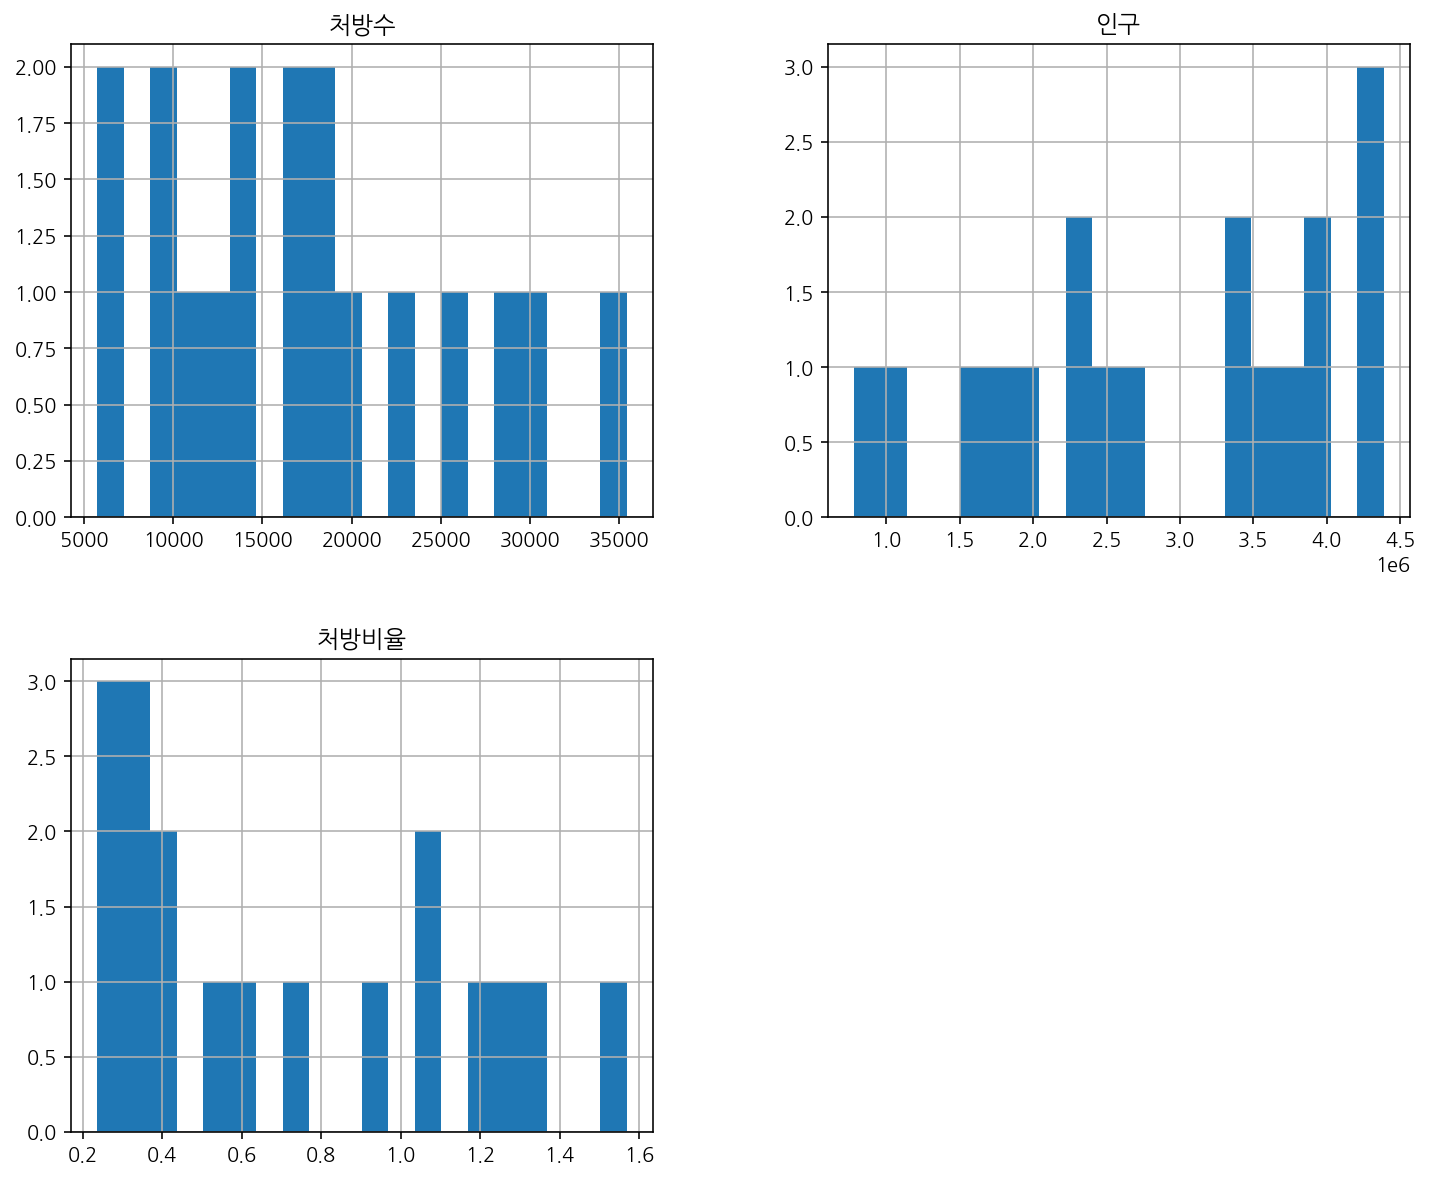

In [83]:
연령별처방df.hist(bins=20, figsize=(12,10))

#### 연령대별인구 (line)

<AxesSubplot:xlabel='연령대'>

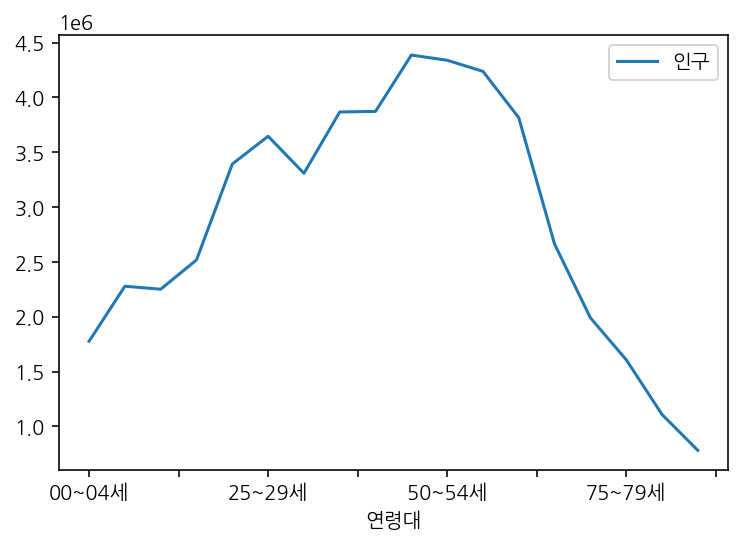

In [36]:
연령별처방df.sort_values("연령대").plot(x="연령대", y="인구")

#### 연령대별 처방횟수 (line)

<AxesSubplot:xlabel='연령대'>

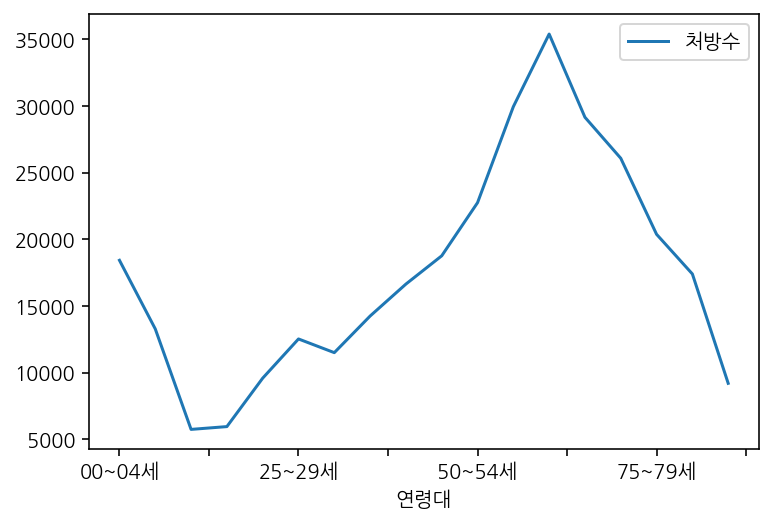

In [43]:
연령별처방df.sort_values("연령대").plot(x="연령대", y="처방수")

#### 연령대별 처방 비율 (line)

<AxesSubplot:xlabel='연령대'>

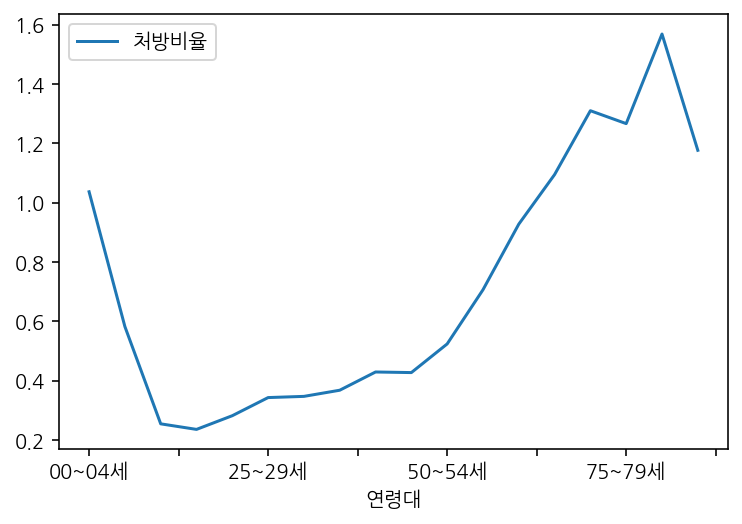

In [44]:
연령별처방df.sort_values("연령대").plot(x="연령대", y="처방비율")

#### 연령대별인구 (bar)

<AxesSubplot:xlabel='연령대', ylabel='인구'>

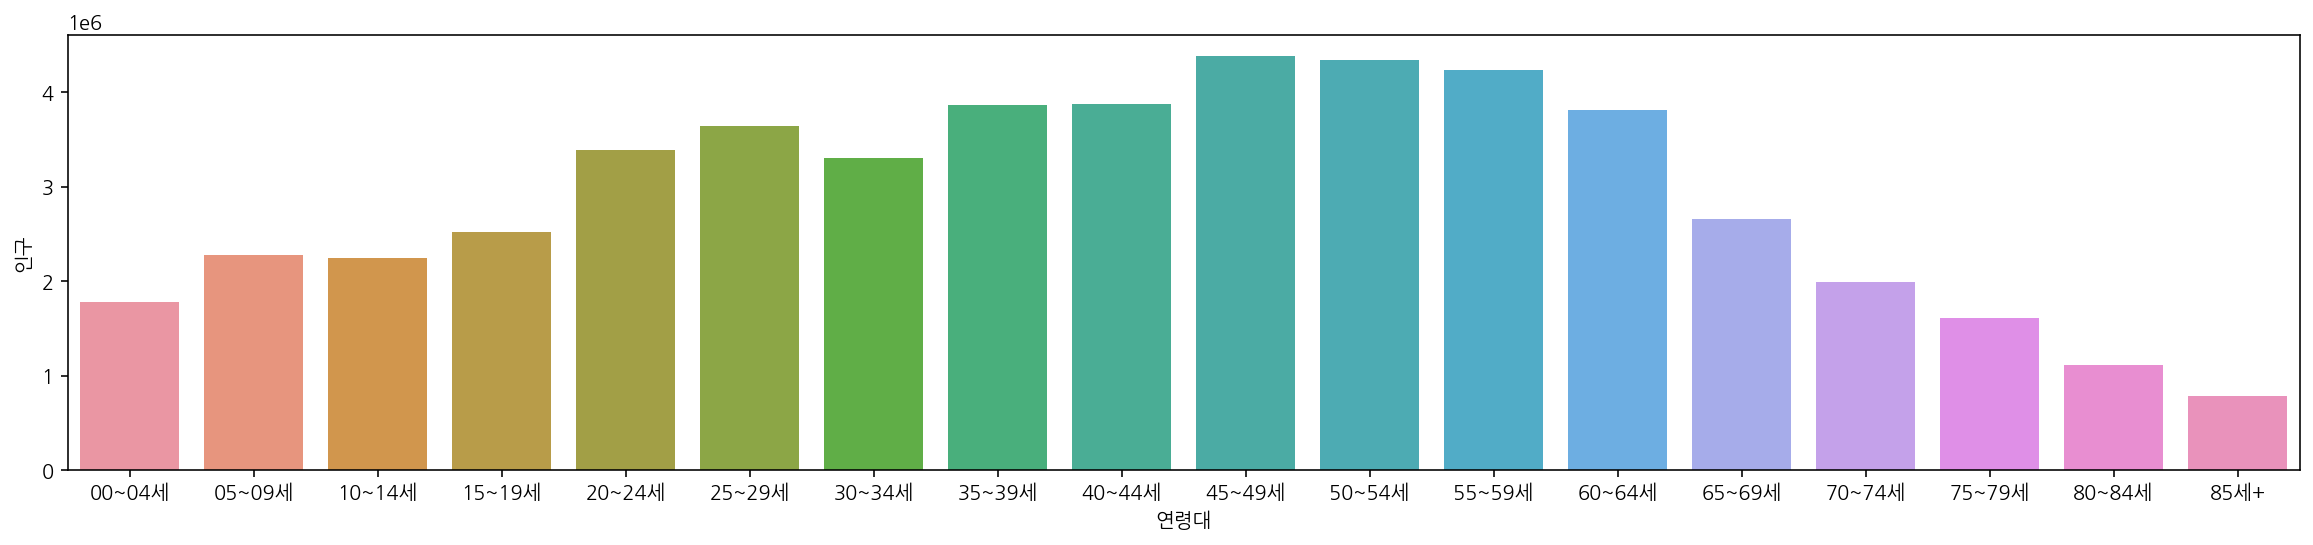

In [285]:
plt.figure(figsize=(20, 4))
sns.barplot(data=연령별처방df, x="연령대", y="인구", ci=None)

#### 연령대별 처방횟수 (bar)

<AxesSubplot:xlabel='연령대', ylabel='count'>

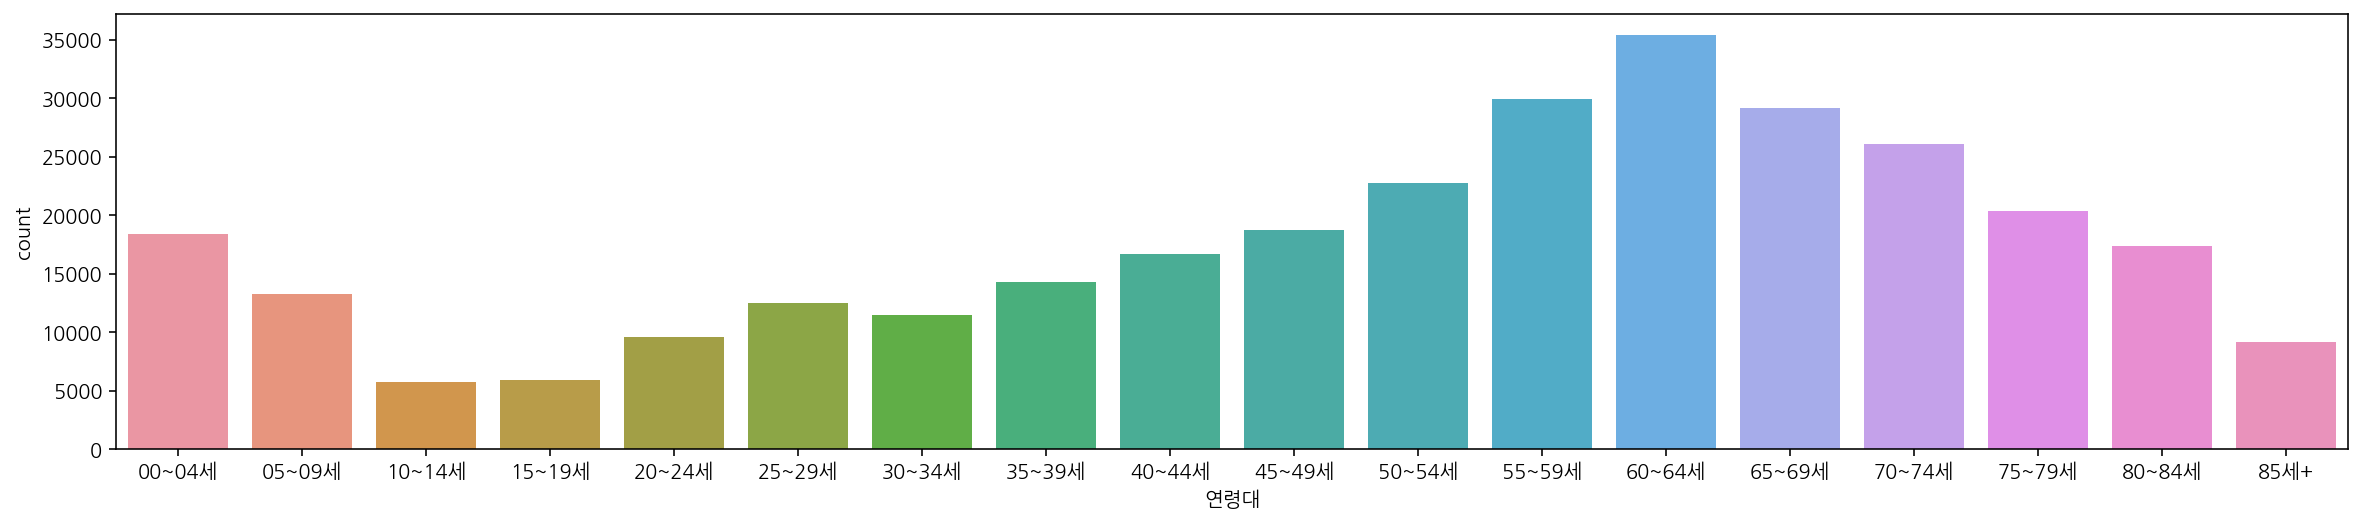

In [46]:
plt.figure(figsize=(20, 4))
sns.countplot(data=df.sort_values("연령대"), x="연령대")

#### 연령대별 처방 비율 (bar)

<AxesSubplot:xlabel='연령대', ylabel='처방비율'>

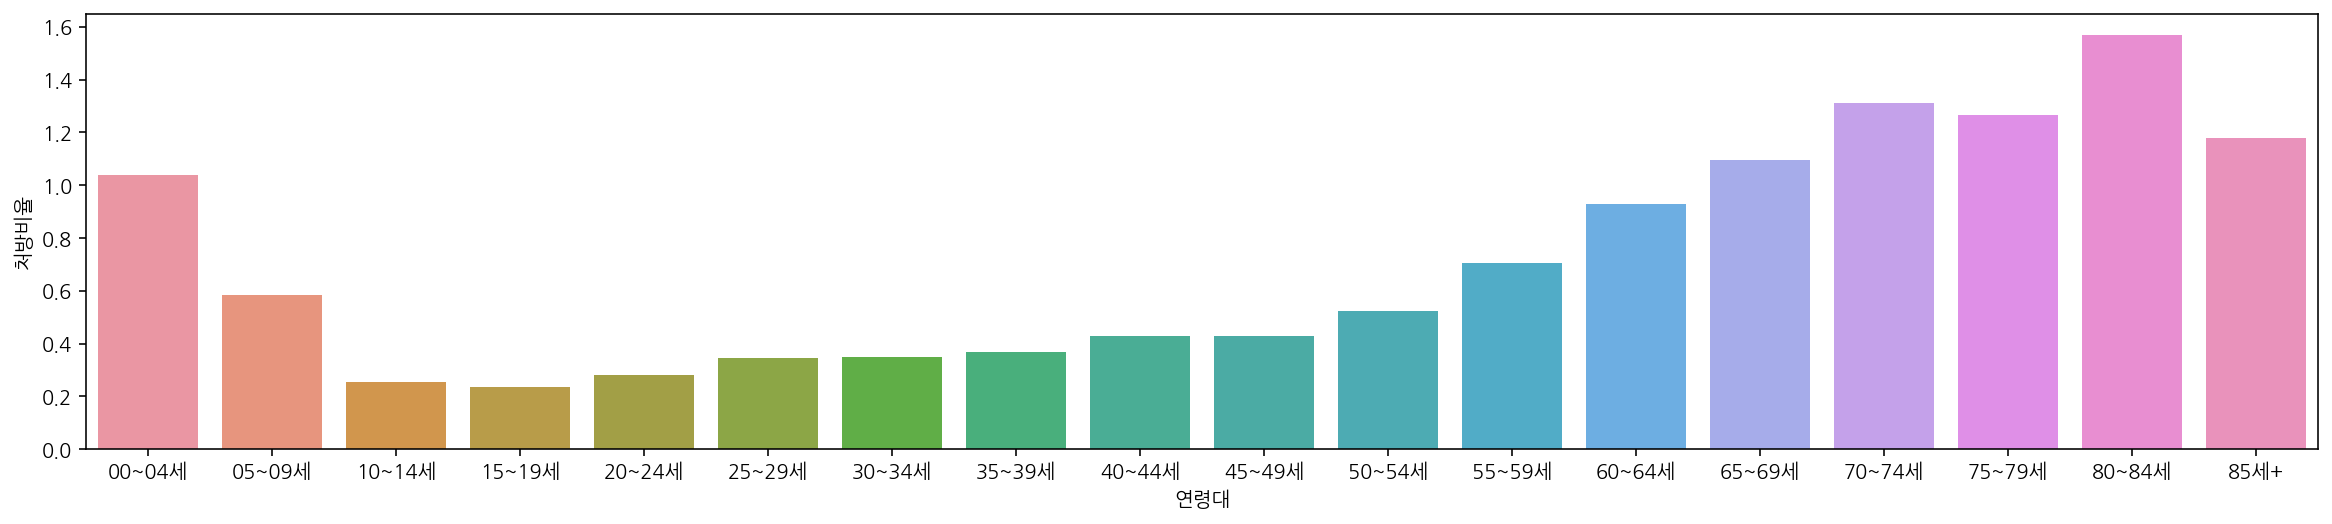

In [157]:
plt.figure(figsize=(20, 4))
sns.barplot(data=연령별처방df, x="연령대", y="처방비율", ci=None)

#### plotly 로도 처방비율 그래프 그려보기

In [82]:
px.histogram(연령별처방df, x="연령대", y="처방비율")

## 연령대의 성별별로도 인구수 구하기

In [62]:
전국성별df =  인구df.loc[(인구df["시도명"] =="전국") & (인구df["성별"] != "전체")]
전국성별df.sample(5)

,시도명,성별,연령대,인구
38,전국,남자,70 - 74세,928928.0
30,전국,남자,30 - 34세,1745712.0
68,전국,여자,100세 이상,4492.0
34,전국,남자,50 - 54세,2177535.0
37,전국,남자,65 - 69세,1280138.0


### 데이터 전처리해주기

In [63]:
전국성별df =  전국성별df.drop(columns="시도명")

In [64]:
전국성별df["연령대"] = 전국성별df["연령대"].str.replace(" - ", "~")

#### 85세 이상의 인구수 데이터 만들어주기

In [65]:
남자85 = 전국성별df.loc[전국성별df["성별"] == "남자"].iloc[-4:]["인구"].sum()
남자85

213113.0

In [66]:
전국성별df = 전국성별df.append({"성별":"남자","연령대":"85세+", "인구": 남자85}, ignore_index=True)

C:\Users\chjy1\AppData\Local\Temp\ipykernel_5800\4187062095.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  전국성별df = 전국성별df.append({"성별":"남자","연령대":"85세+", "인구": 남자85}, ignore_index=True)


In [67]:
여자85 = 전국성별df.loc[전국성별df["성별"] == "여자"].iloc[-4:]["인구"].sum()
여자85

568469.0

In [68]:
전국성별df = 전국성별df.append({"성별":"여자", "연령대":"85세+", "인구": 여자85}, ignore_index=True)

C:\Users\chjy1\AppData\Local\Temp\ipykernel_5800\2636259002.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  전국성별df = 전국성별df.append({"성별":"여자", "연령대":"85세+", "인구": 여자85}, ignore_index=True)


In [69]:
전국성별df["연령대"] = 전국성별df["연령대"].replace({"0~4세":"00~04세", "5~9세" : "05~09세"})

In [70]:
전국성별df

,성별,연령대,인구
0,남자,계,25925697.0
1,남자,00~04세,911251.0
2,남자,05~09세,1168681.0
3,남자,10~14세,1161061.0
4,남자,15~19세,1307326.0
5,남자,20~24세,1779560.0
6,남자,25~29세,1949923.0
7,남자,30~34세,1745712.0
8,남자,35~39세,1999740.0
9,남자,40~44세,1979773.0


## 처방데이터에서 연령 성별 데이터에 인구수 데이터 합치기

In [76]:
전국나이성별df =  df.groupby(["연령대", "성별"])[["처방내역일련번호"]].count().merge(전국성별df, on=["연령대", "성별"])
전국나이성별df.head()

,연령대,성별,처방내역일련번호,인구
0,00~04세,남자,10682,911251.0
1,00~04세,여자,7744,865365.0
2,05~09세,남자,7119,1168681.0
3,05~09세,여자,6160,1109604.0
4,10~14세,남자,3005,1161061.0


### 데이터 정리및 파생변수 만들어주기

In [78]:
전국나이성별df = 전국나이성별df.rename(columns={"처방내역일련번호":"처방수"})

In [79]:
전국나이성별df["인구"] = 전국나이성별df["인구"].astype(int)

In [80]:
전국나이성별df["처방비율"] = 전국나이성별df["처방수"] / 전국나이성별df["인구"] * 100
전국나이성별df.head()

,연령대,성별,처방수,인구,처방비율
0,00~04세,남자,10682,911251,1.172235
1,00~04세,여자,7744,865365,0.894883
2,05~09세,남자,7119,1168681,0.609148
3,05~09세,여자,6160,1109604,0.555153
4,10~14세,남자,3005,1161061,0.258815


#### 연령대/성별 별로 인구 그리기

<AxesSubplot:xlabel='연령대', ylabel='인구'>

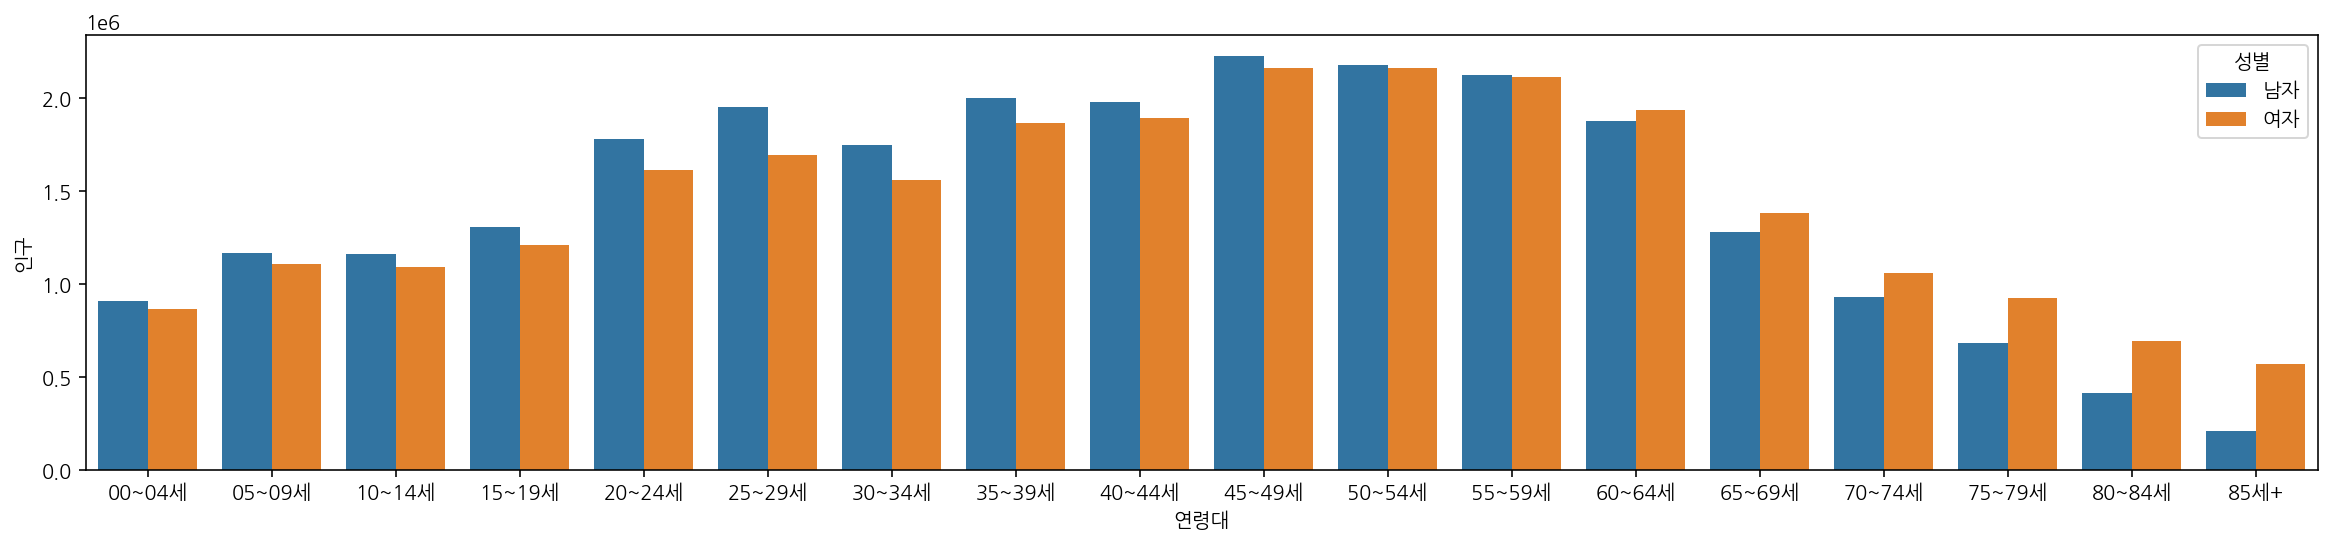

In [85]:
plt.figure(figsize=(20, 4))
sns.barplot(data=전국나이성별df, x="연령대", y="인구", hue="성별", ci=None)

#### 연령대/성별 별로 처방횟수

<AxesSubplot:xlabel='연령대', ylabel='count'>

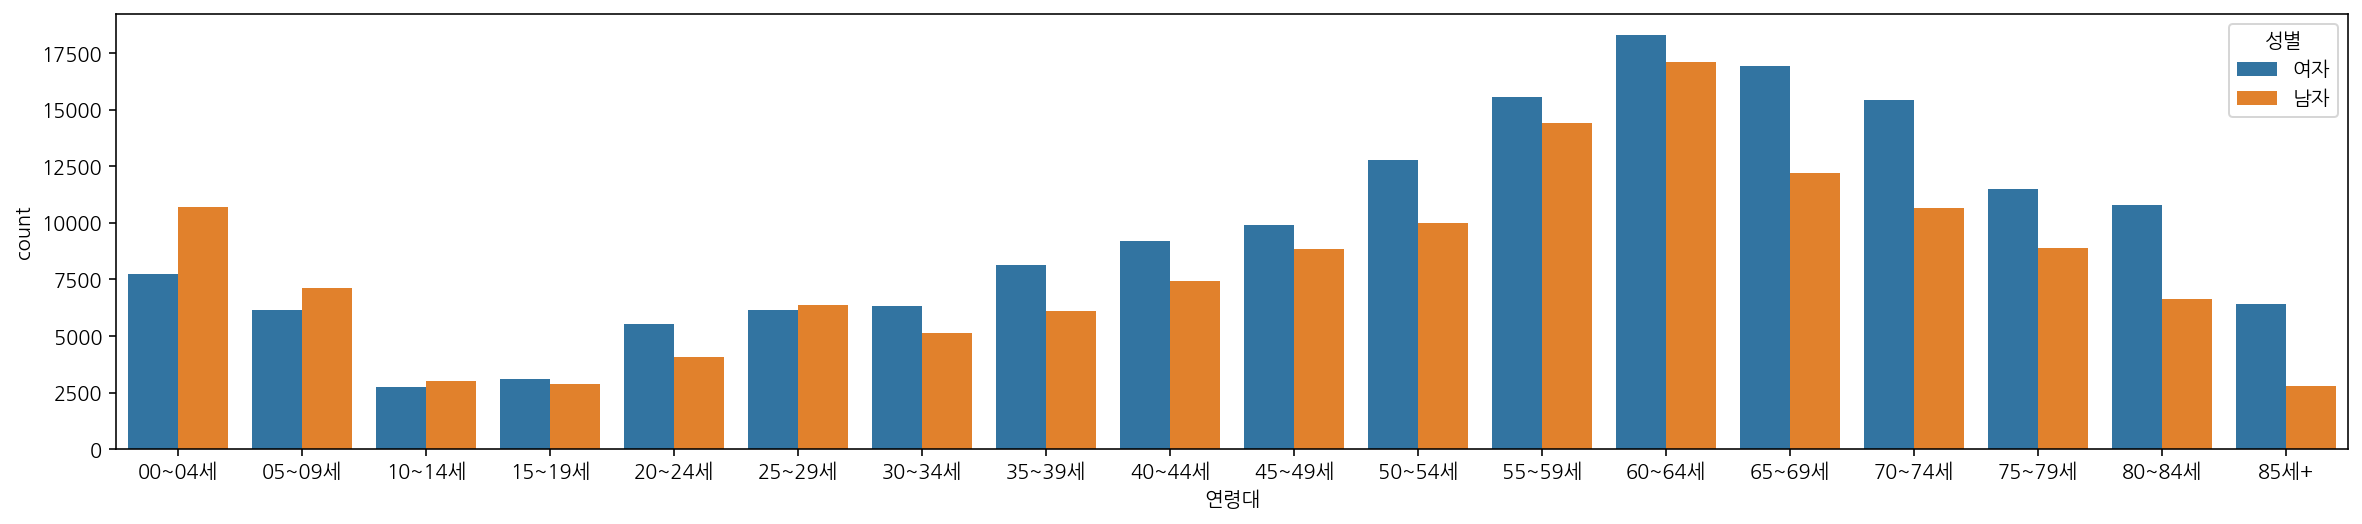

In [187]:
plt.figure(figsize=(20, 4))
sns.countplot(data=df, x="연령대", hue="성별", order=sorted(df["연령대"].unique())) 

#### 연령대/성별 별로 처방비율

<AxesSubplot:xlabel='연령대', ylabel='처방비율'>

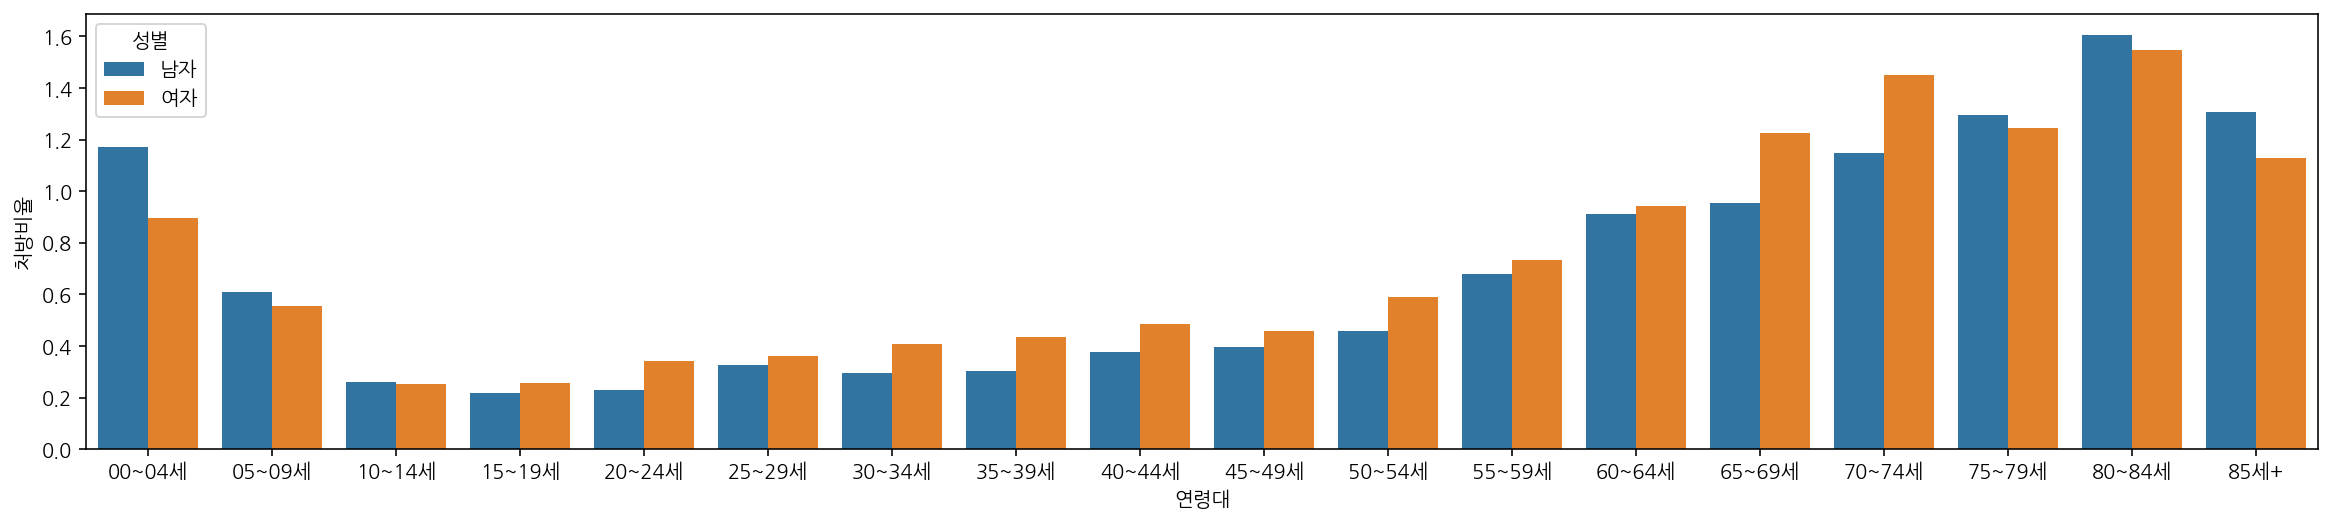

In [249]:
plt.figure(figsize=(20, 4))
sns.barplot(data=전국나이성별df, x="연령대", hue="성별", y="처방비율", ci=None)

## 연령대/성별 별로 금액 데이터 시각화하기

In [103]:
금액나이성별df = df.groupby(["연령대", "성별"])["금액"].agg(["sum", "mean", "count"]).merge(전국성별df, on=["연령대", "성별"])
금액나이성별df.columns

Index(['연령대', '성별', 'sum', 'mean', 'count', '인구'], dtype='object')

In [104]:
금액나이성별df = 금액나이성별df.rename(columns={"sum":"총금액", "mean" : "평균금액", "count":"처방수"})
금액나이성별df.head()

,연령대,성별,총금액,평균금액,처방수,인구
0,00~04세,남자,12702528,1189.152593,10682,911251.0
1,00~04세,여자,9097690,1174.805010,7744,865365.0
2,05~09세,남자,23248333,3265.673971,7119,1168681.0
3,05~09세,여자,13824255,2244.197240,6160,1109604.0
4,10~14세,남자,7034252,2340.849251,3005,1161061.0


In [105]:
금액나이성별df["인구"] = 금액나이성별df["인구"].astype(int)

In [106]:
금액나이성별df["인구비총금액"] = 금액나이성별df["총금액"]/금액나이성별df["인구"] * 100

In [107]:
금액나이성별df.head()

,연령대,성별,총금액,평균금액,처방수,인구,인구비총금액
0,00~04세,남자,12702528,1189.152593,10682,911251,1393.965878
1,00~04세,여자,9097690,1174.805010,7744,865365,1051.312452
2,05~09세,남자,23248333,3265.673971,7119,1168681,1989.279624
3,05~09세,여자,13824255,2244.197240,6160,1109604,1245.872852
4,10~14세,남자,7034252,2340.849251,3005,1161061,605.846893


### 연령대/성별별 총금액

<AxesSubplot:xlabel='연령대', ylabel='총금액'>

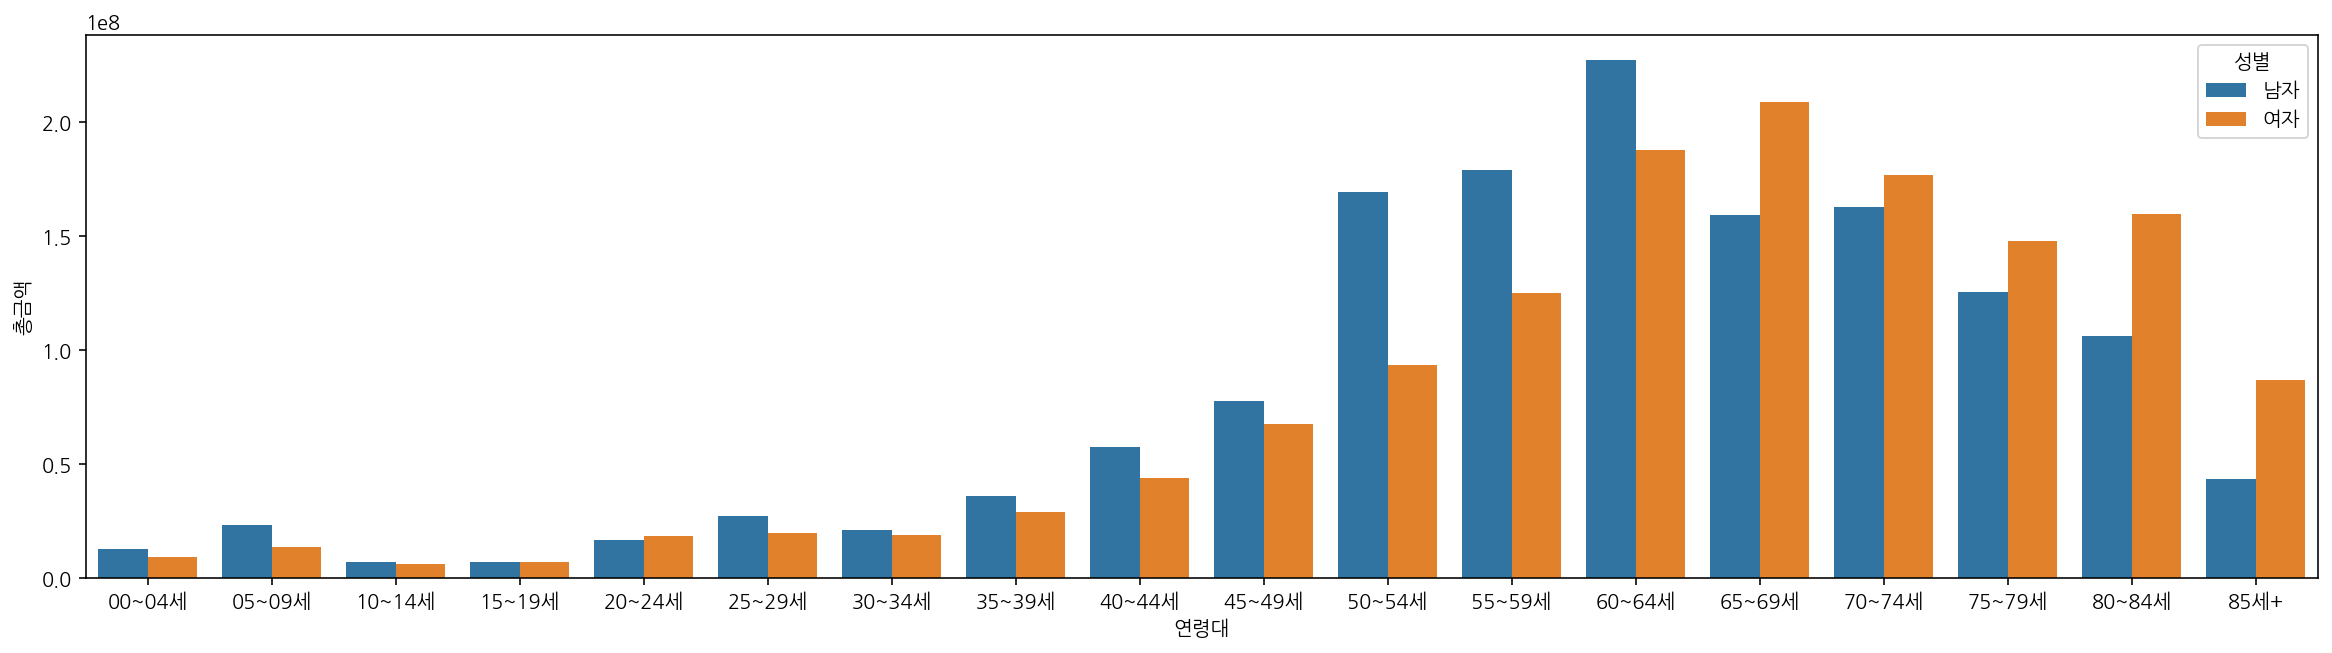

In [309]:
plt.figure(figsize=(20, 5))
sns.barplot(data=금액나이성별df, x="연령대", hue="성별", y="총금액")

### 연령대/성별별 인구비총금액

<AxesSubplot:xlabel='연령대', ylabel='인구비총금액'>

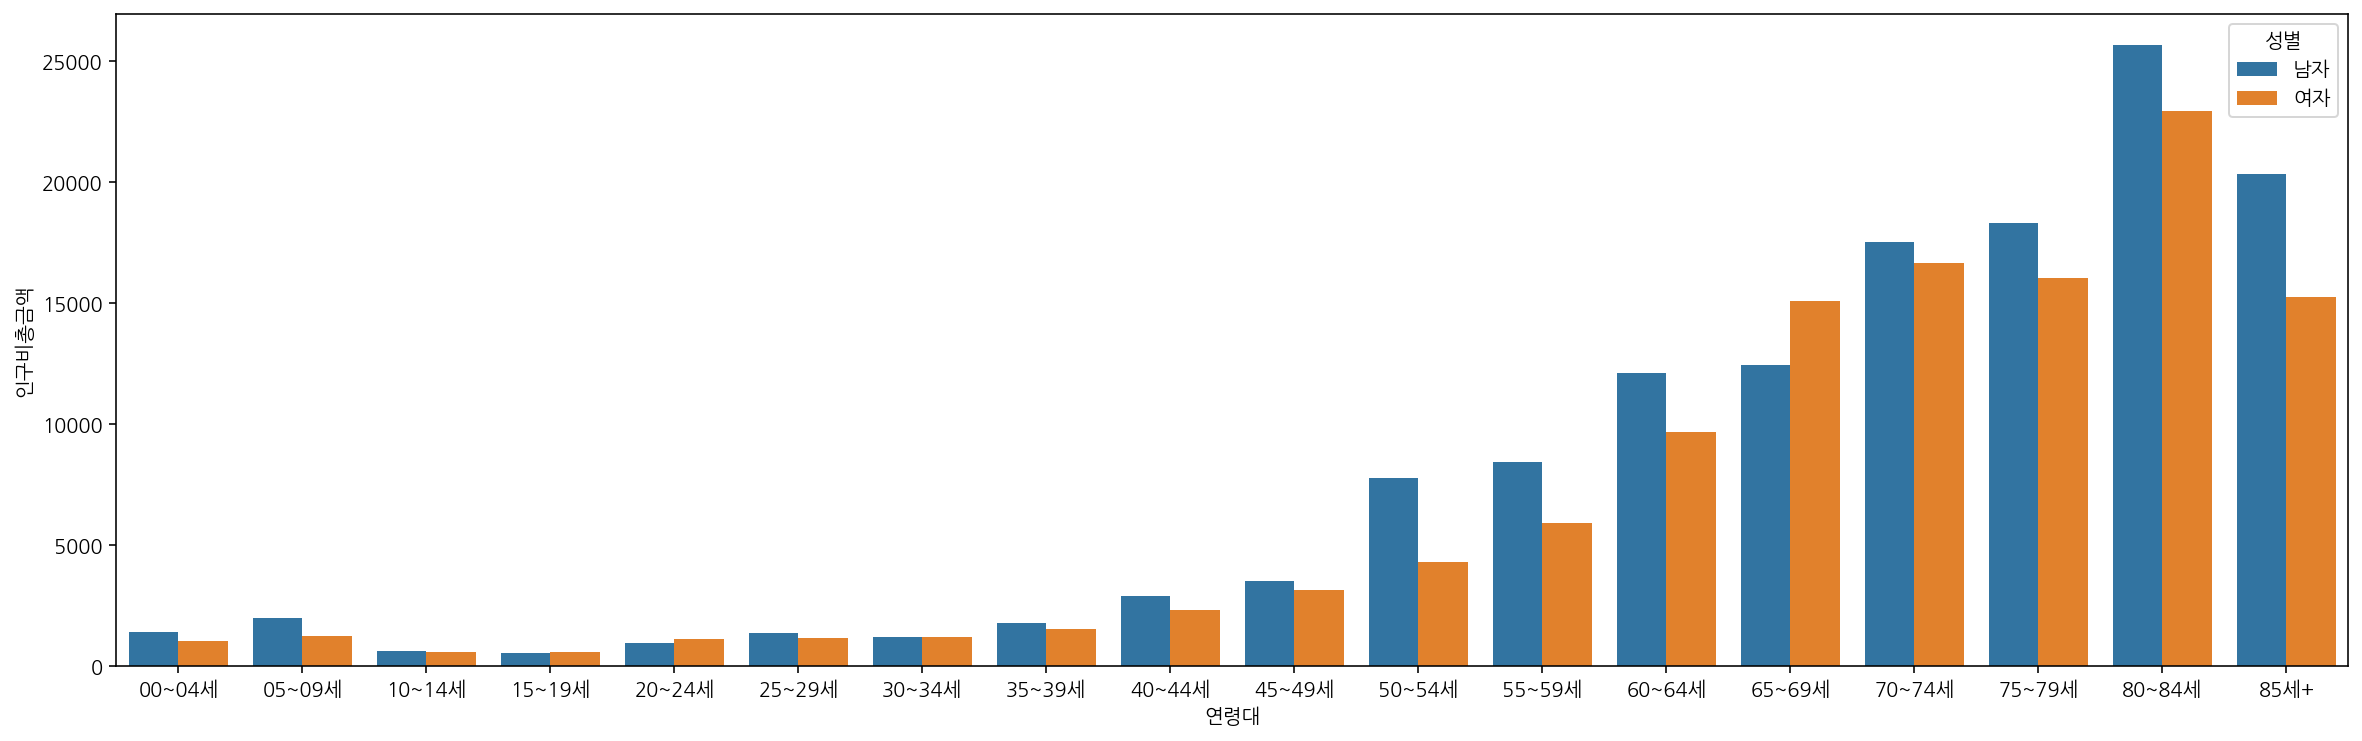

In [ ]:
plt.figure(figsize=(20, 6))
sns.barplot(data=금액나이성별df, x="연령대", hue="성별", y="인구비총금액")

- 총금액으로 봤을 때는, 50-64세 남성들이 처방금액이 높거나 처방을 많이 받는 것으로 보이고, 65세부터는 여성들이 처방금액이 높거나 처방을 많이 받는 것으로 보인다. 
- 인구비로 봤을때는 80-84세 남성들이 가장 높은 처방비용을 내고 있는 것을 확인 할 수 있다. 그다음은 80-84세 여성들이다. 

### 연령대 총금액

<AxesSubplot:xlabel='연령대', ylabel='총금액'>

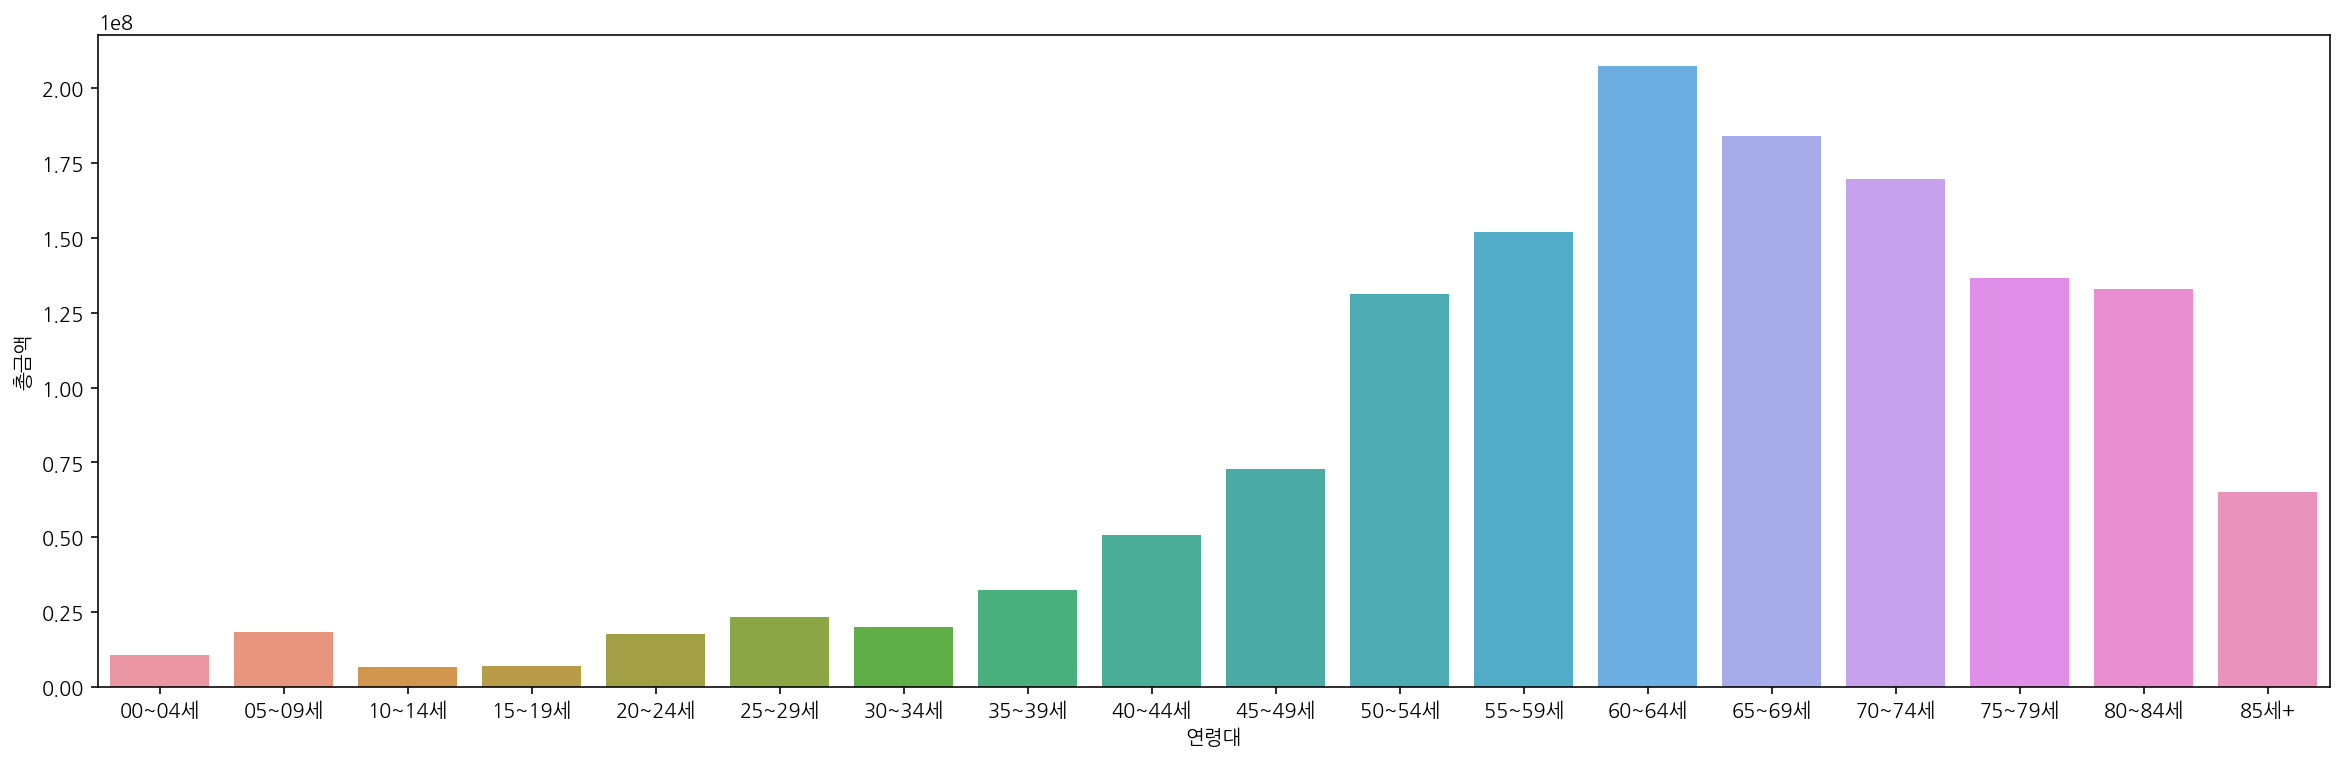

In [101]:
plt.figure(figsize=(20, 6))
sns.barplot(data=금액나이성별df, x="연령대", y="총금액", ci=None)

### 연령대 인구비총금액

<AxesSubplot:xlabel='연령대', ylabel='인구비총금액'>

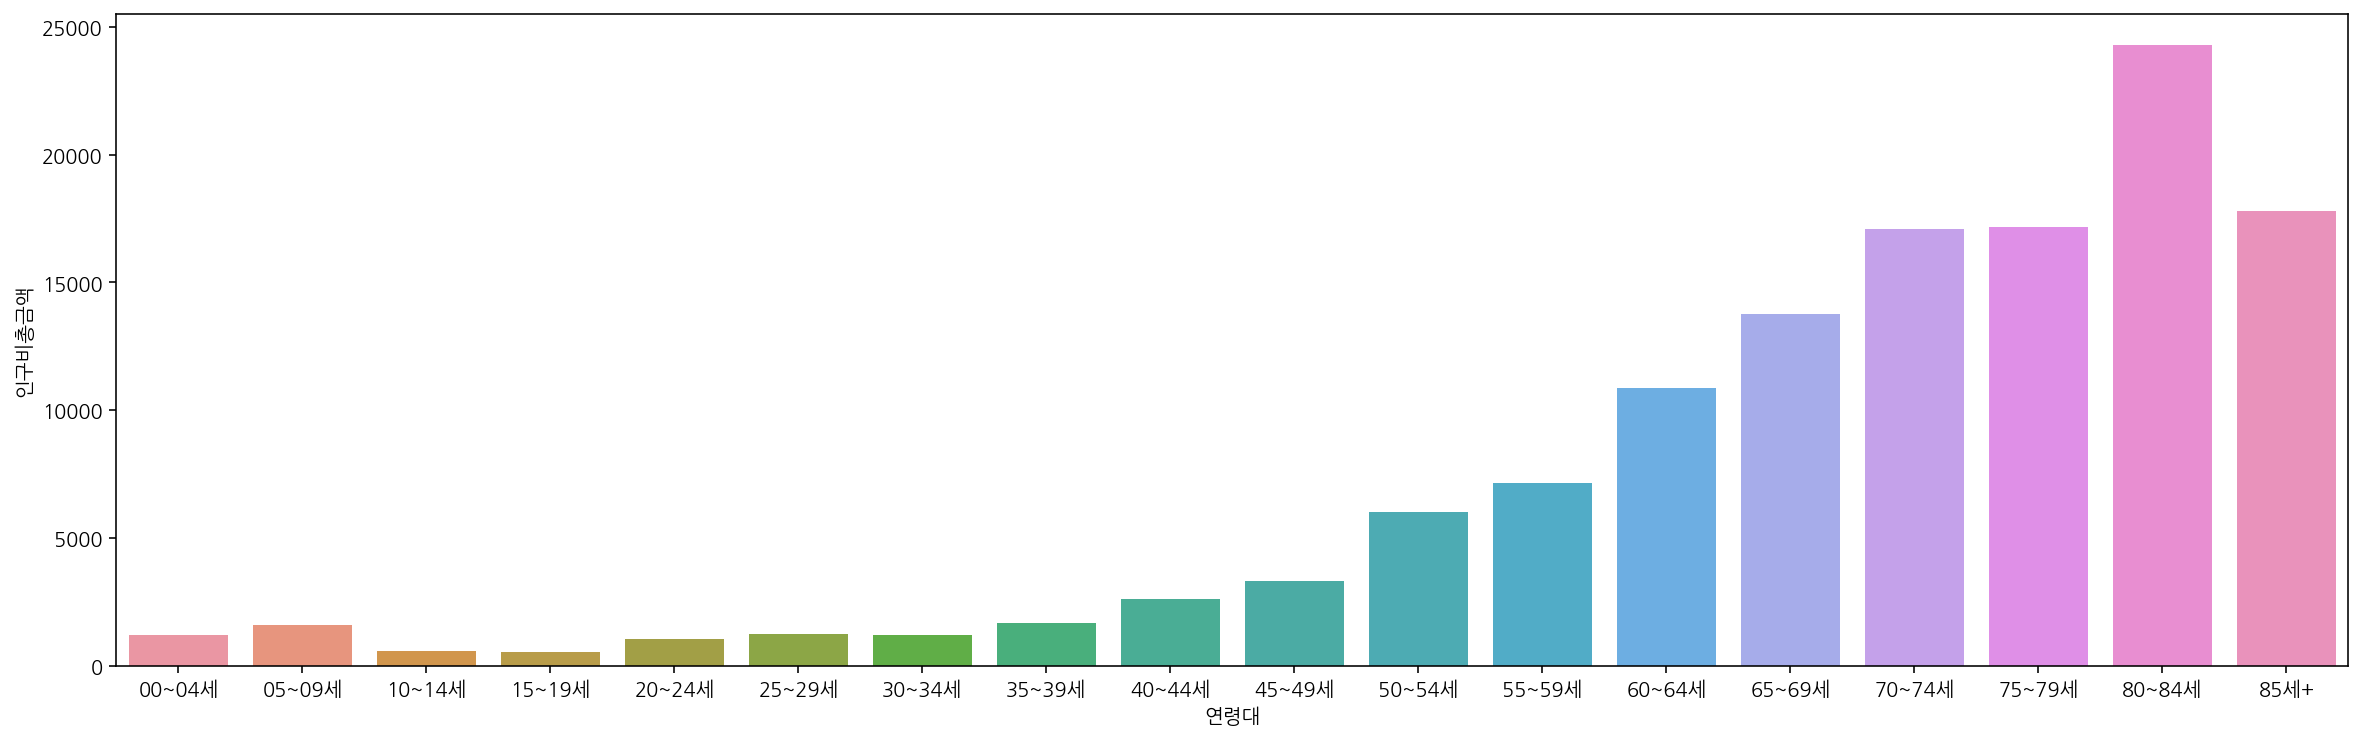

In [100]:
plt.figure(figsize=(20, 6))
sns.barplot(data=금액나이성별df, x="연령대", y="인구비총금액", ci=None)

- 총 금액만 봤을때는 60-64세가 약처방에 가장 많은 금액을 지불하는 것으로 보이지만, 인구비로 봤을때는 80-84세가 가장 높고 그 다음이 85세 이상이라는 것을 알 수 있다. 

### 연령대/성별별 평균금액

<AxesSubplot:xlabel='연령대', ylabel='평균금액'>

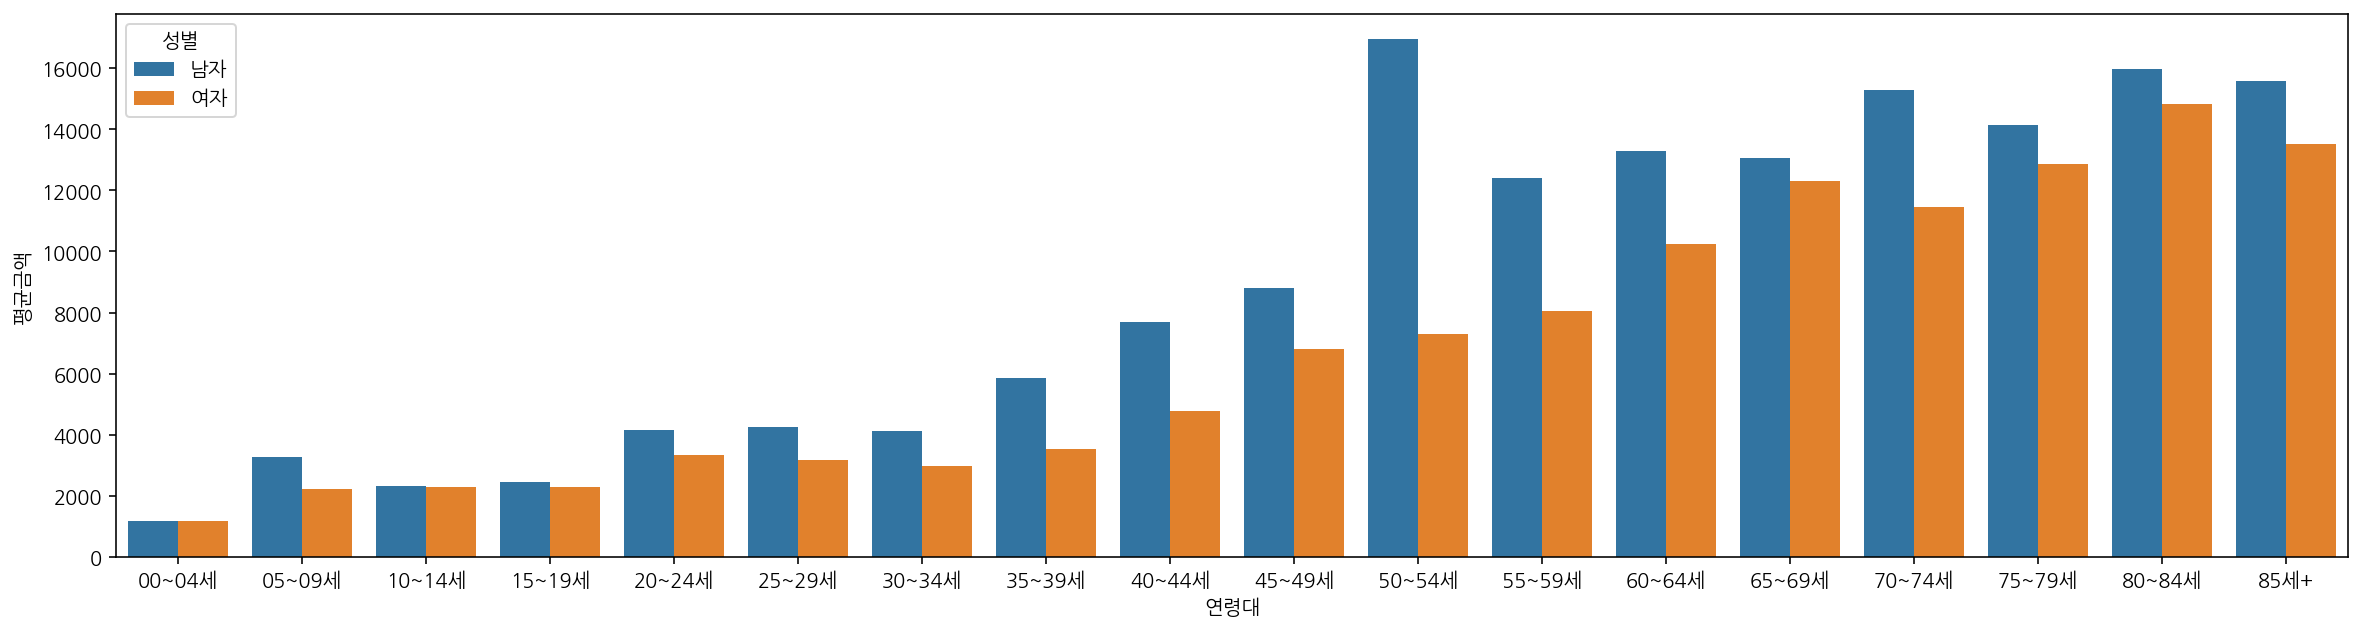

In [102]:
plt.figure(figsize=(20, 5))
sns.barplot(data=금액나이성별df, x="연령대", hue="성별", y="평균금액")

- 처방을 받는 사람중에서 50~54세 남성의 평균 처방금액이 가장 높은 것을 알 수 있다. 

#### plotly로 그려보기

In [110]:
px.histogram(금액나이성별df, x="연령대", y="총금액",color="성별", barmode="group")

In [112]:
px.histogram(금액나이성별df, x="연령대", y="인구비총금액",color="성별", barmode="group")

## 투약관련 데이터 시각화 해보기

In [119]:
투약df = df[["연령대", "성별", "1일투약량", "1회 투약량", "총투여일수"]].copy()

In [120]:
투약df["하루총투약량"] =  투약df["1일투약량"] * 투약df["1회 투약량"]

In [121]:
투약df["총투약량"] =  투약df["하루총투약량"] * 투약df["총투여일수"]

In [122]:
투약df.head()

,연령대,성별,1일투약량,1회 투약량,총투여일수,하루총투약량,총투약량
0,35~39세,여자,2,2.0,5,4.0,20.0
1,35~39세,여자,3,1.0,3,3.0,9.0
2,35~39세,여자,3,1.0,3,3.0,9.0
3,35~39세,여자,3,1.0,3,3.0,9.0
4,35~39세,여자,3,1.0,3,3.0,9.0


### 투약데이터 상관계수랑 히트맵 그려보기

In [133]:
투약df.corr()

,1일투약량,1회 투약량,총투여일수,하루총투약량,총투약량
1일투약량,1.000000,-0.081278,-0.405854,0.059466,-0.128614
1회 투약량,-0.081278,1.000000,-0.052470,0.951763,0.179566
총투여일수,-0.405854,-0.052470,1.000000,-0.104084,0.707232
하루총투약량,0.059466,0.951763,-0.104084,1.000000,0.211827
총투약량,-0.128614,0.179566,0.707232,0.211827,1.000000


<AxesSubplot:>

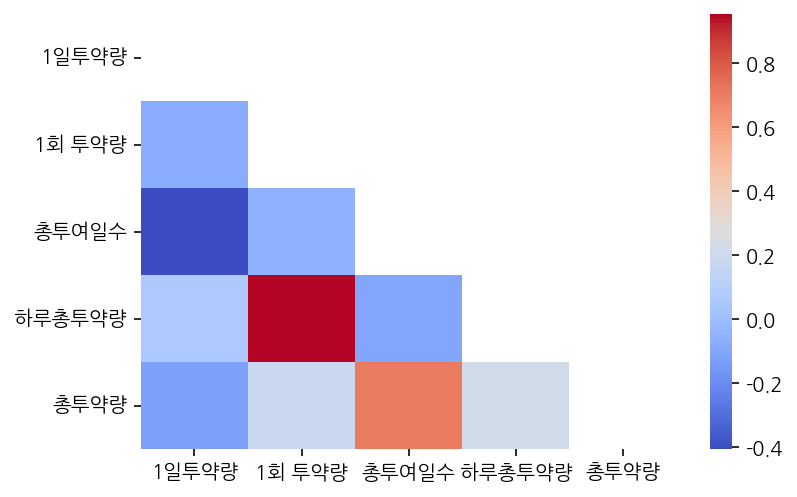

In [140]:
mask = np.triu(np.ones_like(투약df.corr()))
sns.heatmap(data=투약df.corr(), cmap="coolwarm", mask=mask)

### 연령대별 하루 총 투약량

<AxesSubplot:xlabel='연령대', ylabel='하루총투약량'>

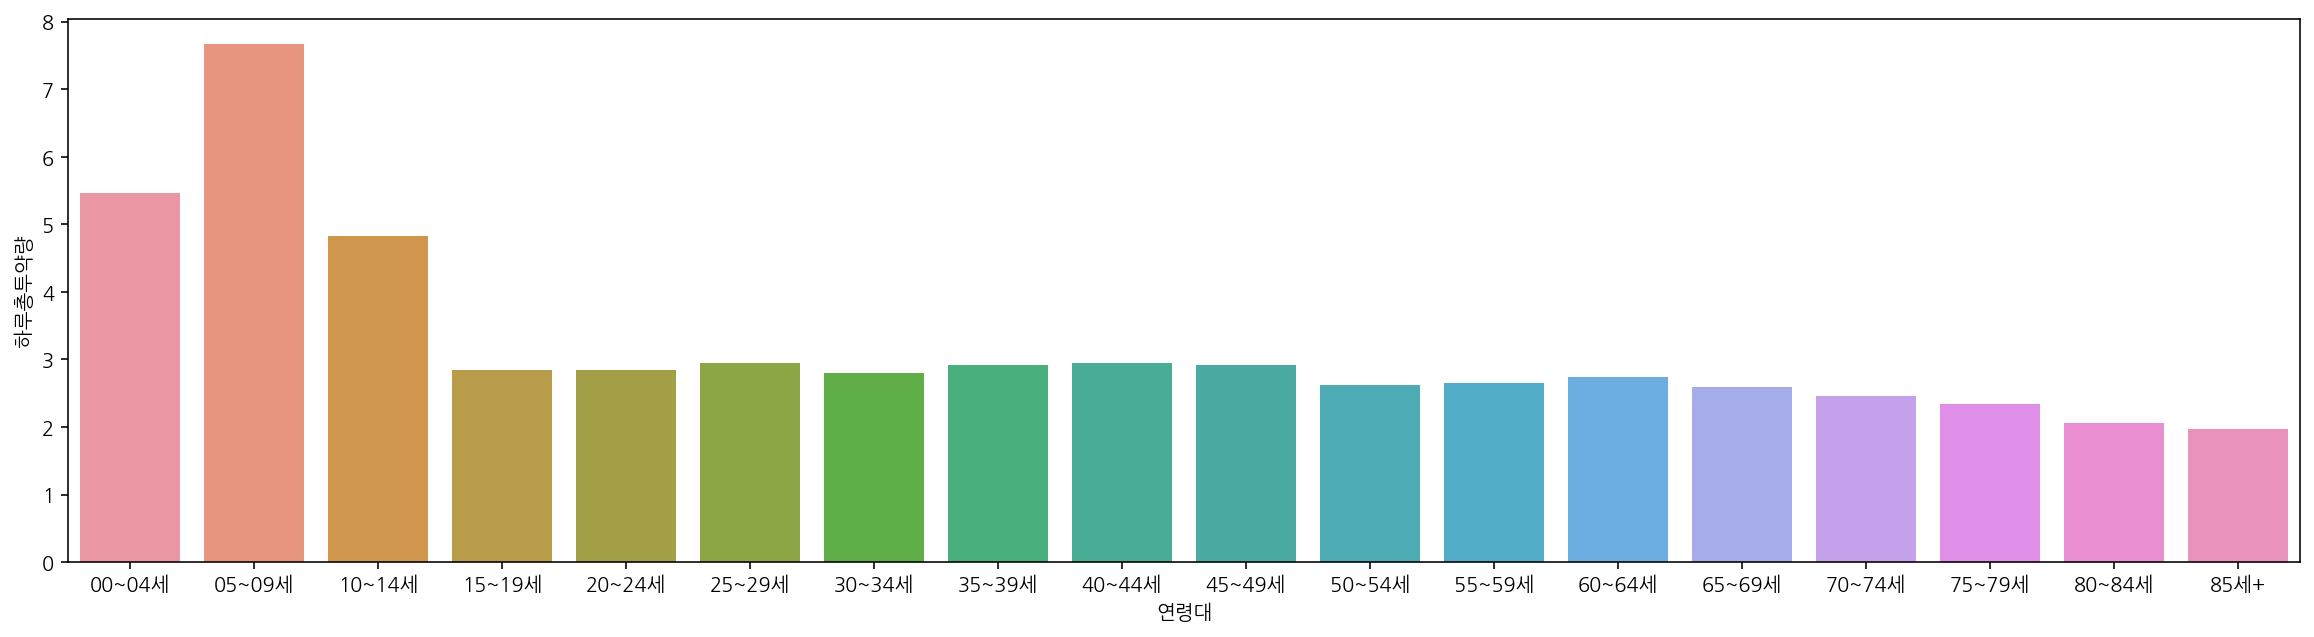

In [128]:
plt.figure(figsize=(20, 5))
sns.barplot(data=투약df, x="연령대", y="하루총투약량", ci=None, order=sorted(투약df["연령대"].unique()))

### 연령대별 총 투여 일수 

<AxesSubplot:xlabel='연령대', ylabel='총투여일수'>

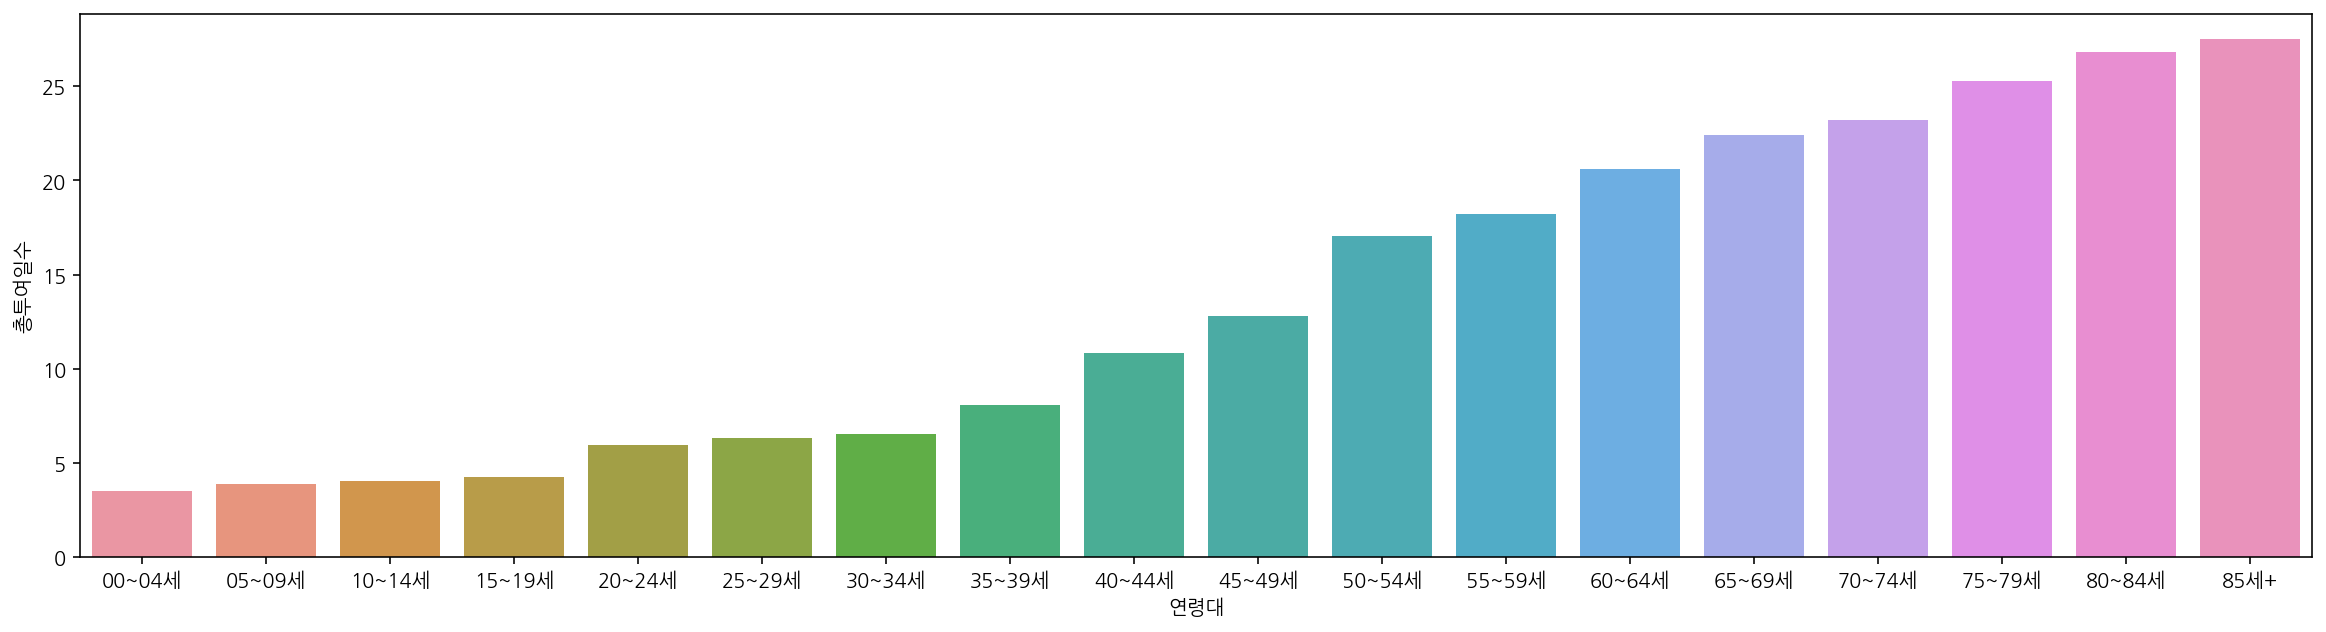

In [129]:
plt.figure(figsize=(20, 5))
sns.barplot(data=투약df, x="연령대", y="총투여일수", ci=None, order=sorted(투약df["연령대"].unique()))

### 연령대별 총 투약량

<AxesSubplot:xlabel='연령대', ylabel='총투약량'>

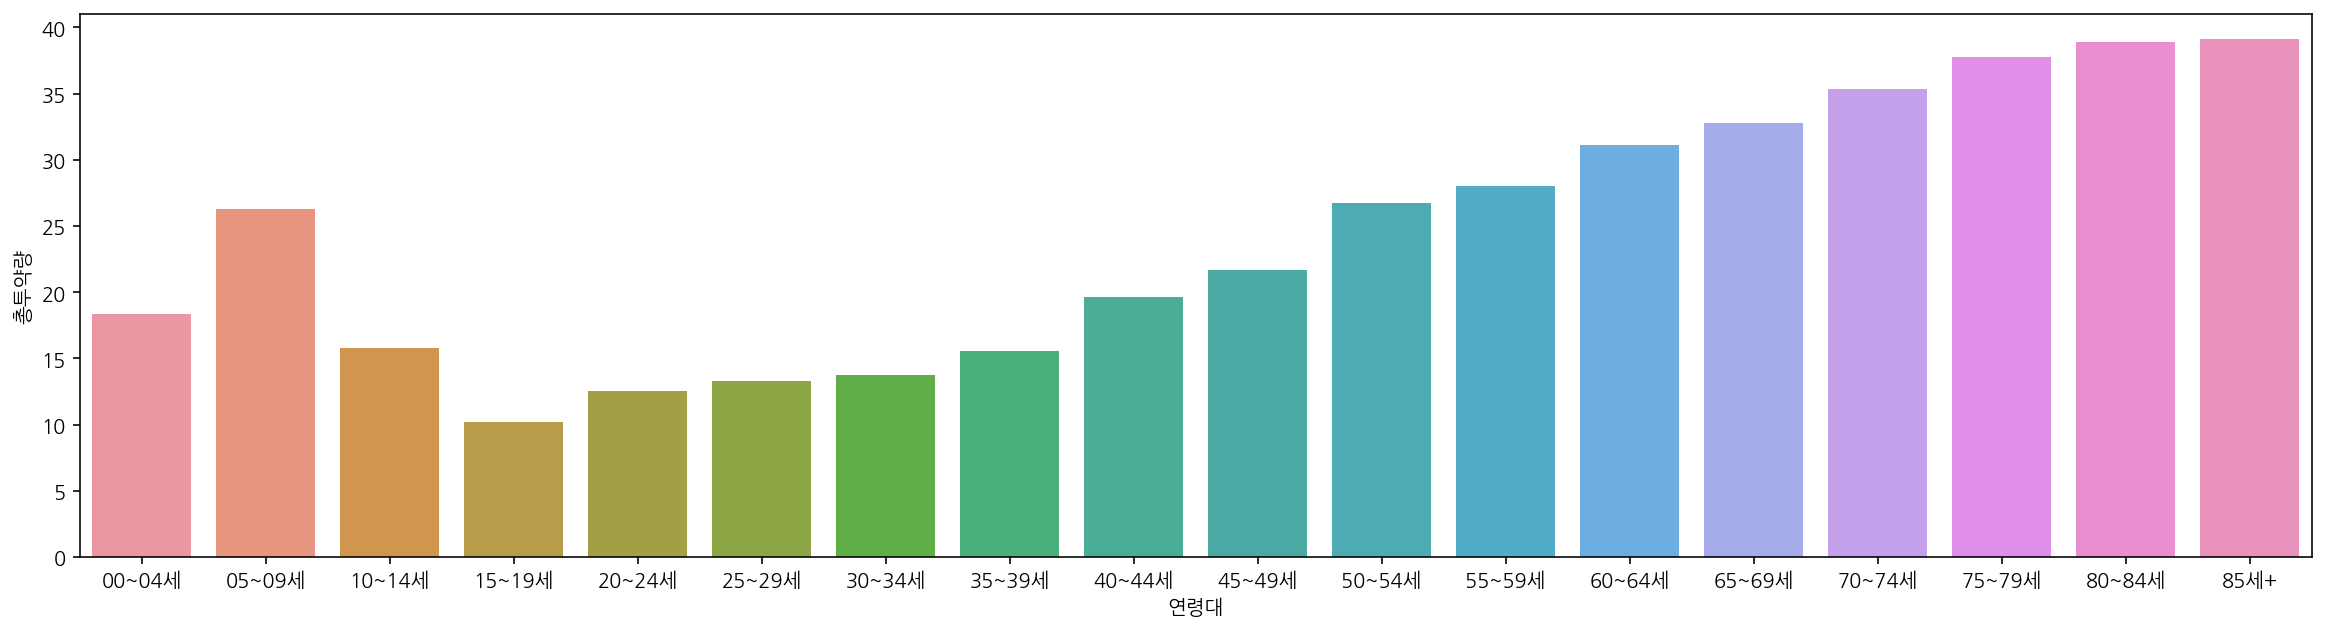

In [ ]:
plt.figure(figsize=(20, 5))
sns.barplot(data=투약df, x="연령대", y="총투약량", ci=None, order=sorted(투약df["연령대"].unique()))

- 하루 투약량이 많은건 14세 이하 어린 아이들이고, 특히 5-9세 아이들이 하루 투약량이 가장 많다. 
- 총 투약일수는 연령대가 높아질수록 같이 높아진다. 
- 총 투약량을 보면, 10-39세까지는 투약량이 적은 편으로 볼 수 있다. 

## 금액와 제형관련 데이터 시각화 하기

In [142]:
금액제형df = df[["연령대", "성별", "총투여일수", "단가", "금액", "투여코드", "제형"]]

In [143]:
제형12 = 금액제형df["제형"].value_counts().nlargest(12)

In [145]:
제형12df = 금액제형df.loc[금액제형df["제형"].isin(제형12.index)]

#### 가장많은 상위 12개의 제형의 단가 시각화하기

<AxesSubplot:xlabel='제형', ylabel='단가'>

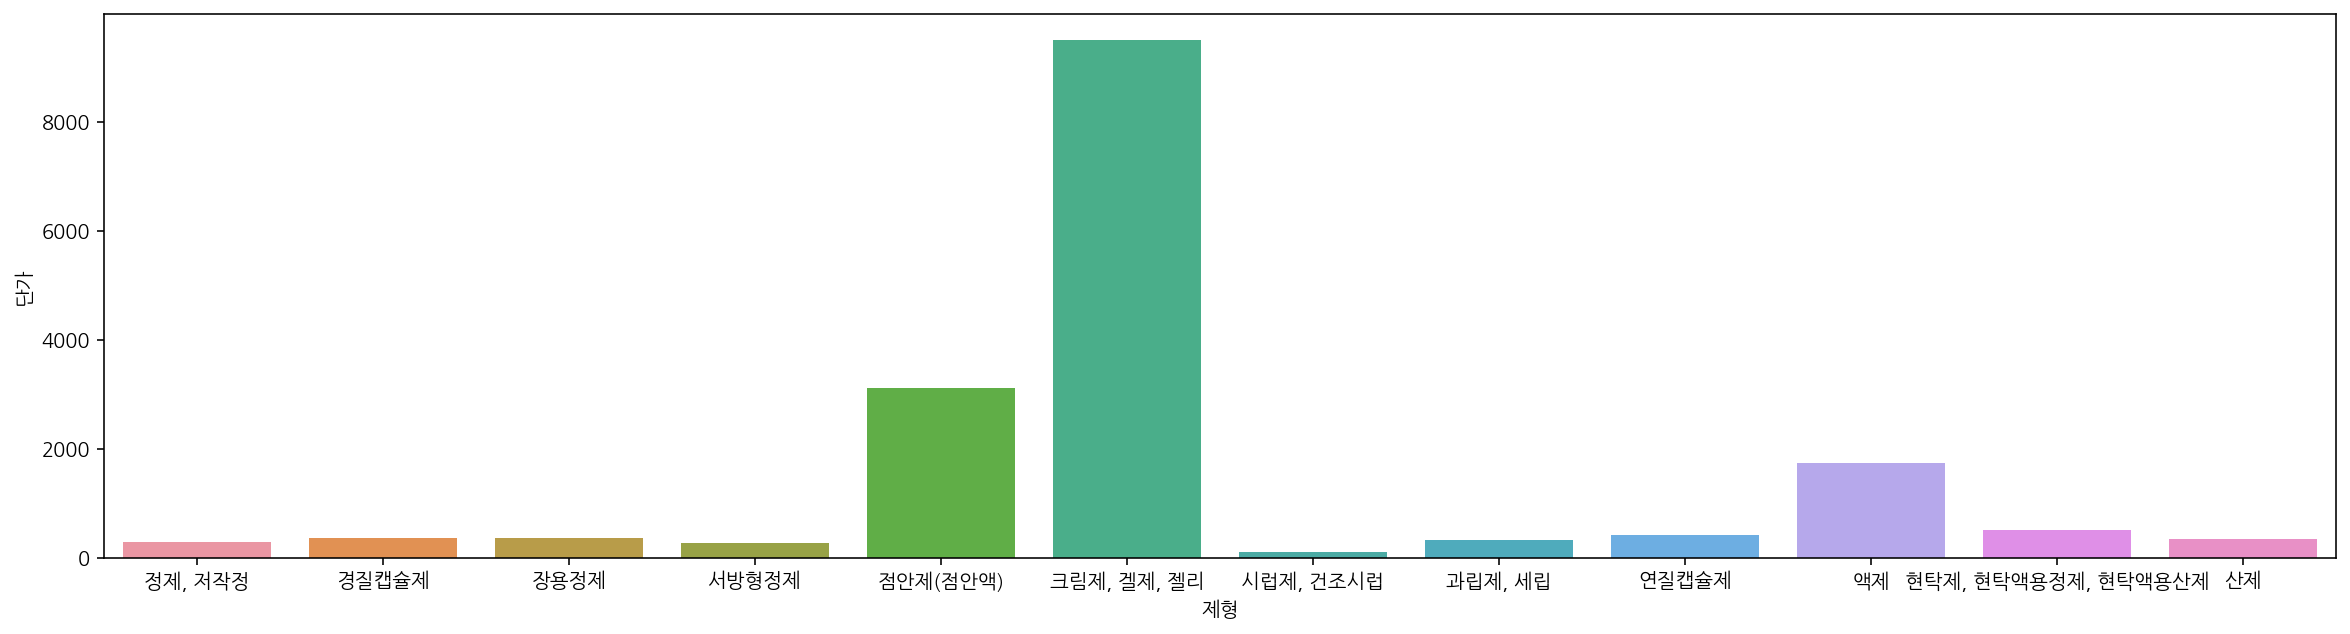

In [146]:
plt.figure(figsize=(20, 5))
sns.barplot(data=제형12df , x="제형", y="단가", ci=None)

<AxesSubplot:xlabel='제형', ylabel='금액'>

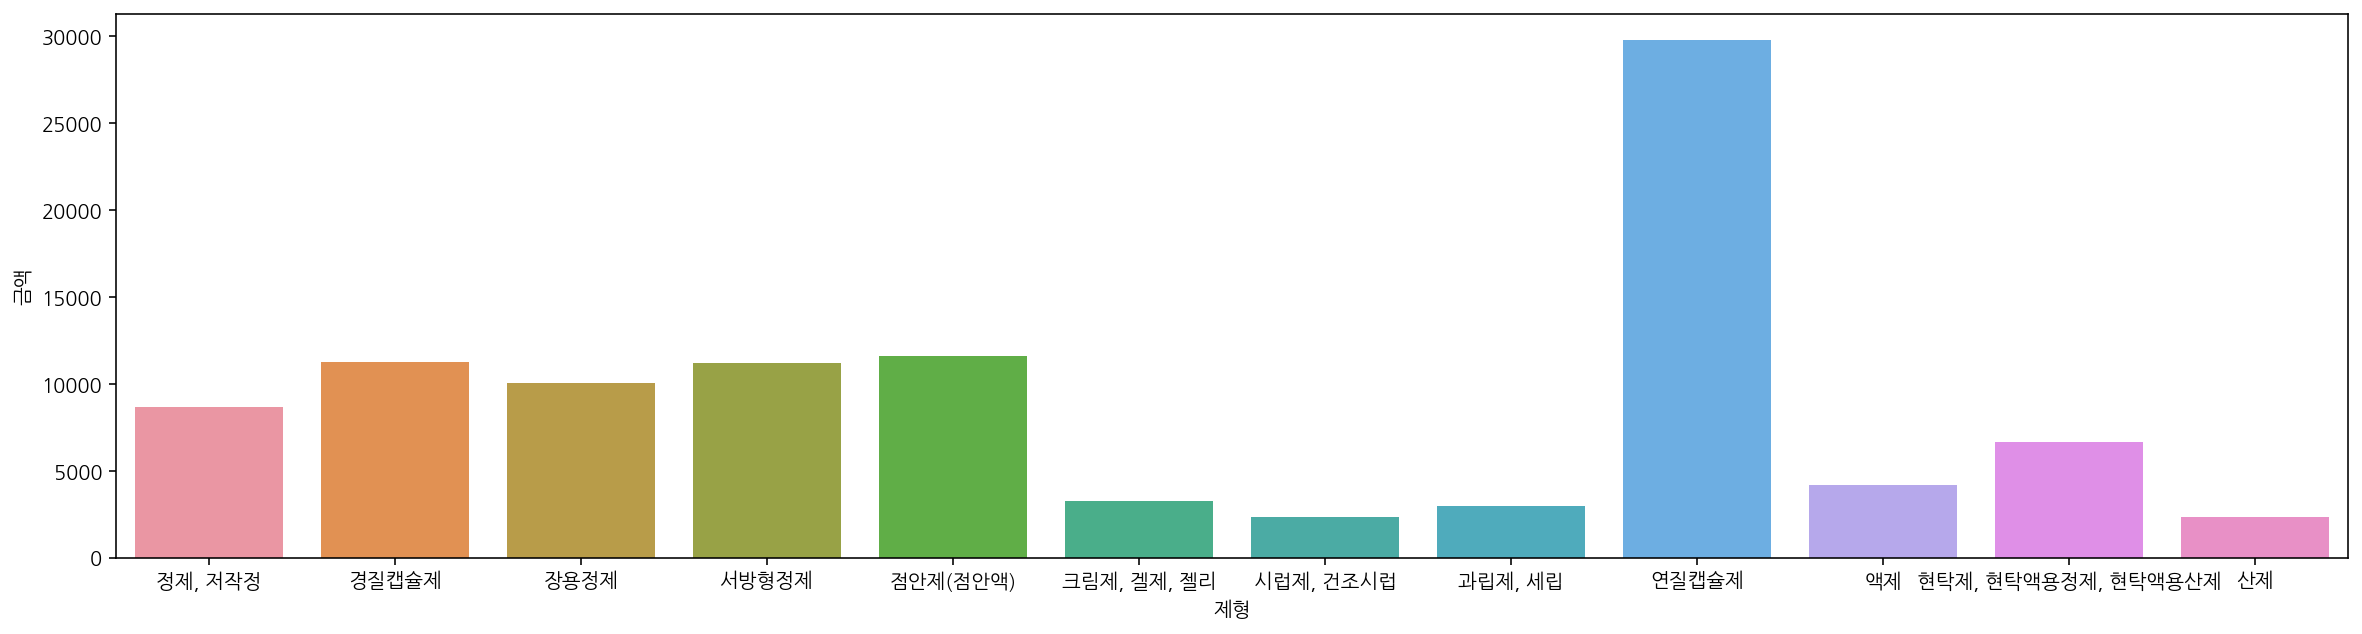

In [147]:
plt.figure(figsize=(20, 5))
sns.barplot(data=제형12df , x="제형", y="금액", ci=None)

<AxesSubplot:xlabel='제형', ylabel='count'>

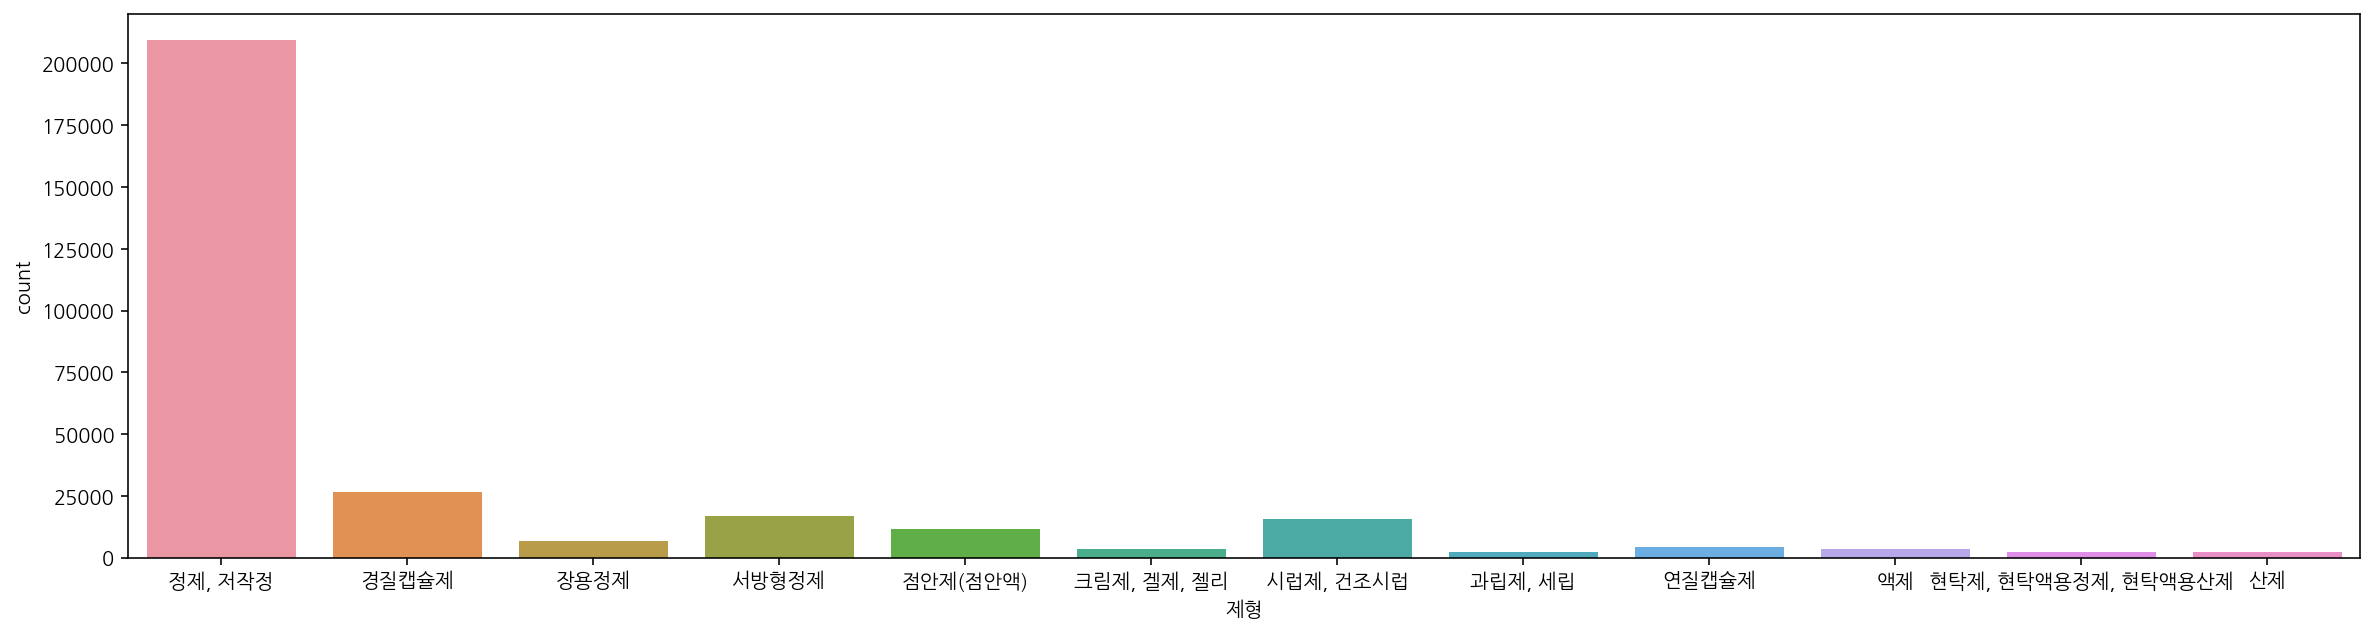

In [152]:
plt.figure(figsize=(20, 5))
sns.countplot(data=제형12df , x="제형")

<AxesSubplot:xlabel='제형', ylabel='금액'>

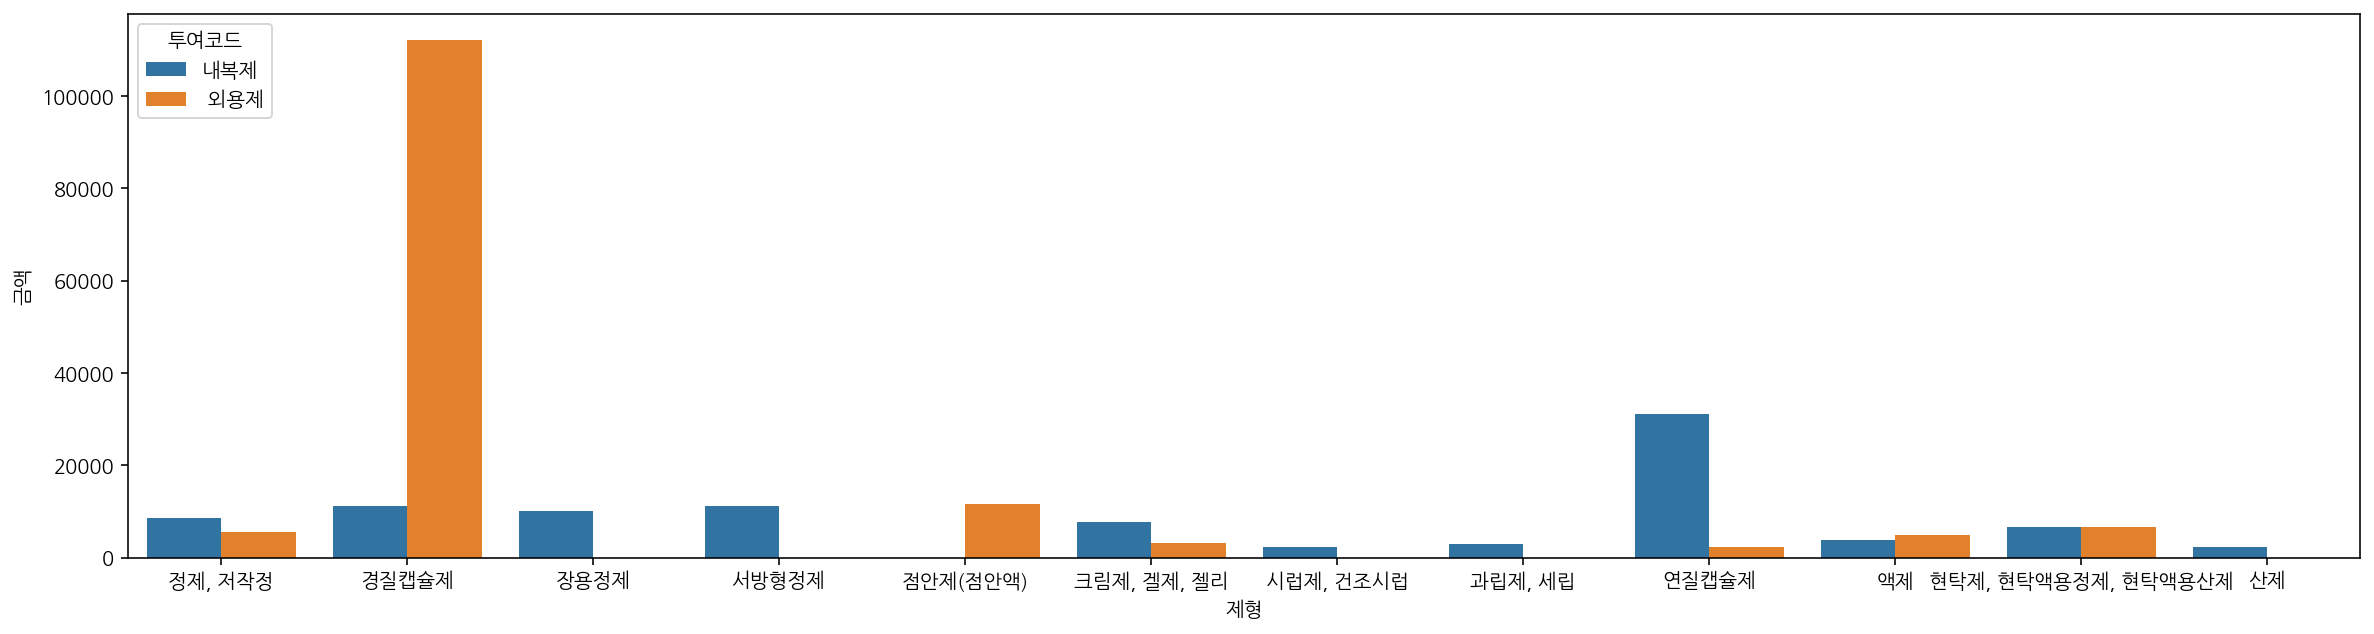

In [151]:
plt.figure(figsize=(20, 5))
sns.barplot(data=제형12df , x="제형", y="금액", hue="투여코드", ci=None)

### 투여코드 시각화하기

<AxesSubplot:xlabel='투여코드', ylabel='count'>

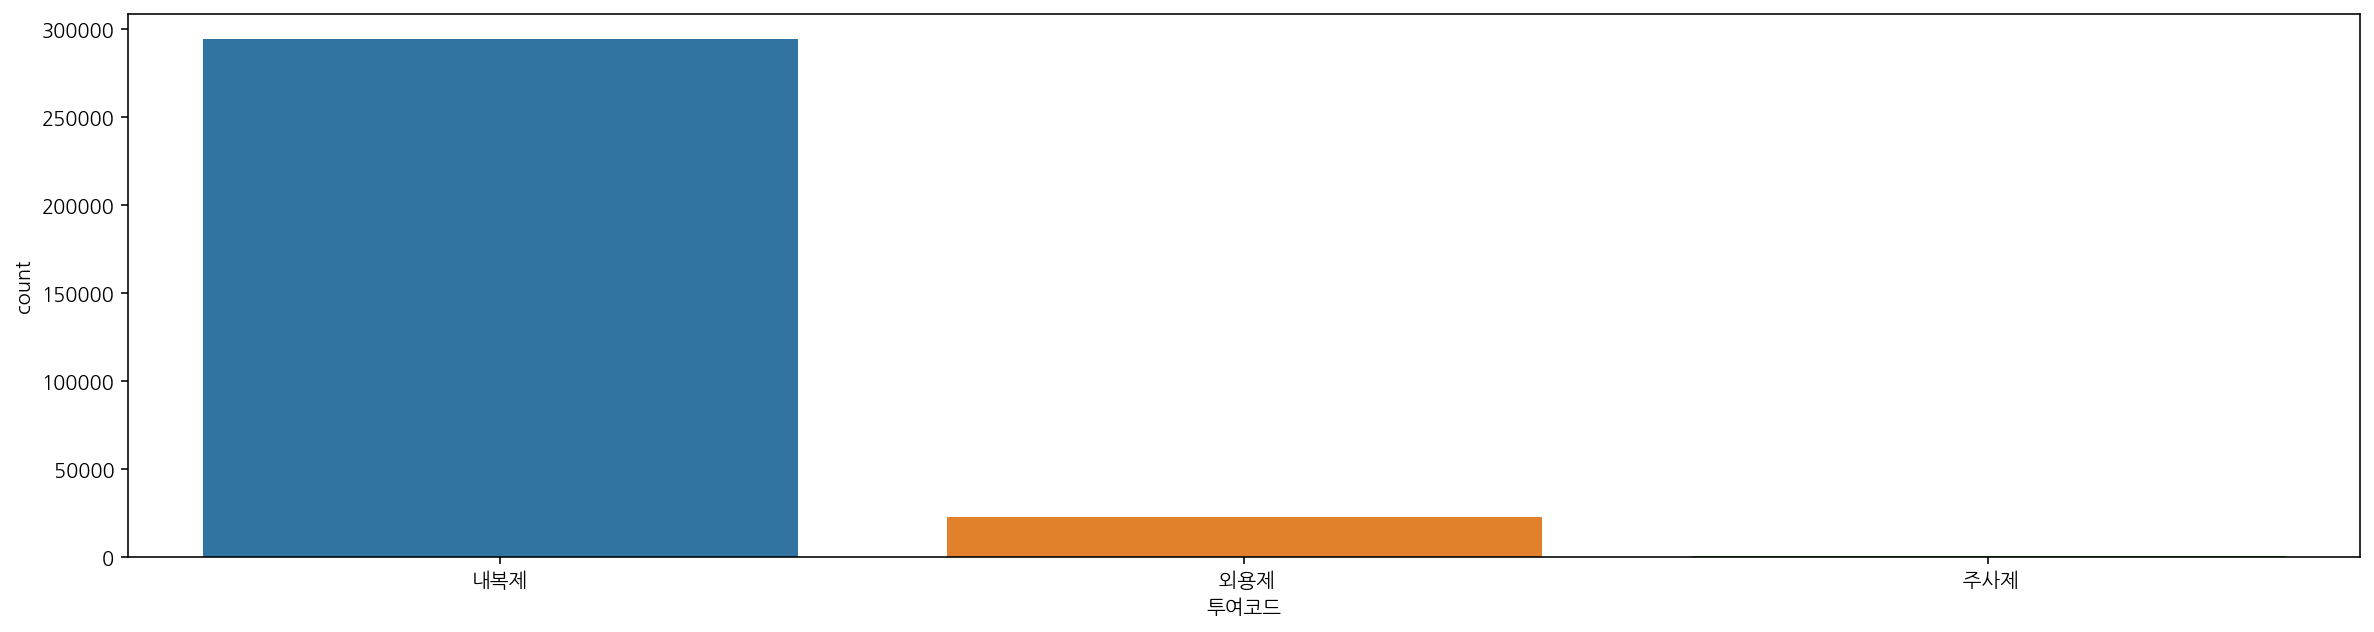

In [149]:
plt.figure(figsize=(20, 5))
sns.countplot(data=금액제형df, x="투여코드")

<AxesSubplot:xlabel='투여코드', ylabel='단가'>

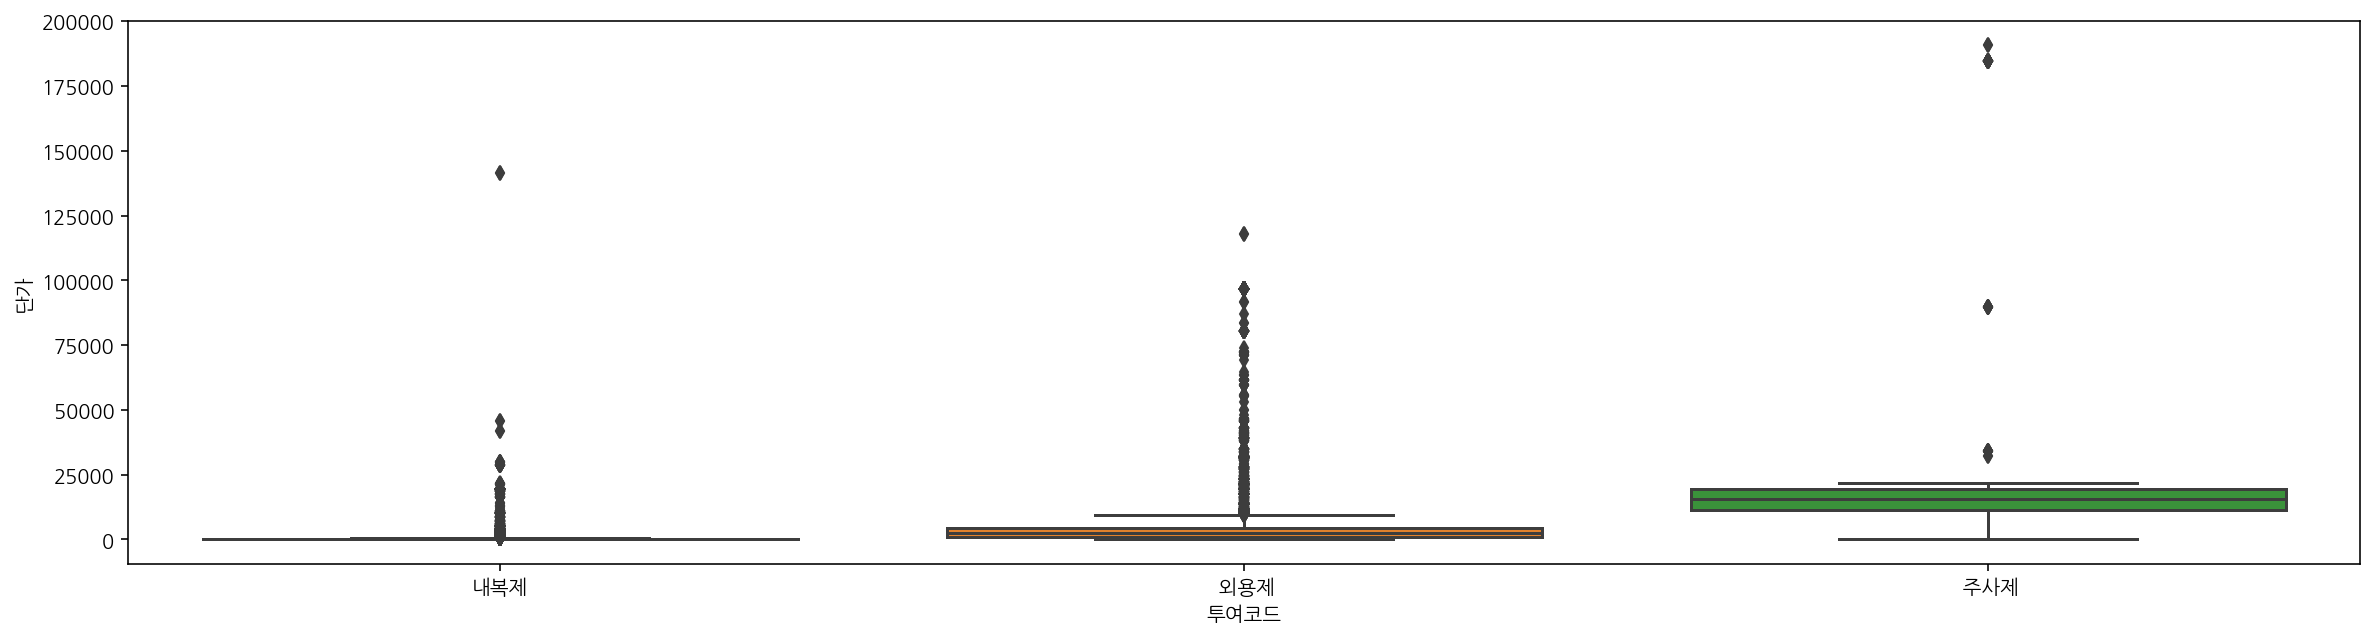

In [148]:
plt.figure(figsize=(20, 5))
sns.boxplot(data=금액제형df, x="투여코드", y="단가")

<AxesSubplot:xlabel='투여코드', ylabel='단가'>

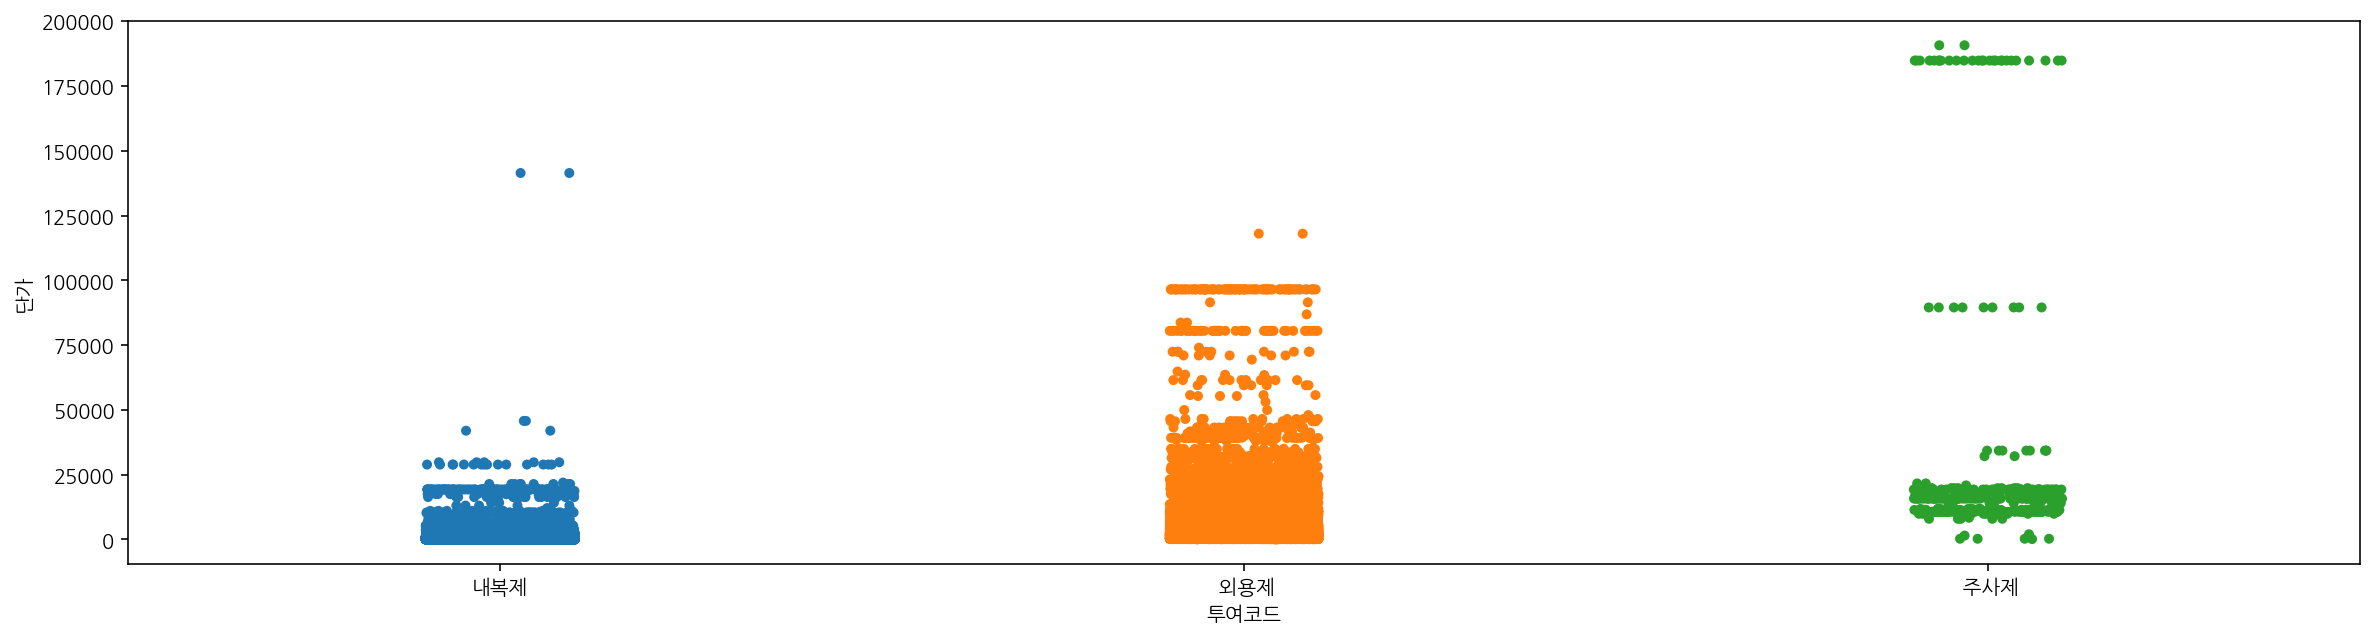

In [150]:
plt.figure(figsize=(20, 5))
sns.stripplot(data=금액제형df, x="투여코드", y="단가")

- 가장 객수가 많은건 내복제인데, 금액이 낮게 모여있다. 
- 주사제는 처방 갯수는 가장 적은데 다른 투여방식에 비해 비싸다. 

## EDA 결과 알게된 것
### 처방 횟수 자체는 60-64 세가 가장 많지만, 인구수 대비 비율로 봤을 때 처방비율은 80-84세가 가장 많다. 
### 처방 횟수로 봤을 때 노령에도 여성들이 처방을 많이 받는 것으로 나타난다. 하지만 인구 비율로 봤을때 75세 이상에서는 남자들의 처방비율이 더 높은 것을 알 수 있다. 
### 59세까지는 남자 인구가 더 많고, 60세 이상부터는 여성의 인구비율이 더 높은 것을 알 수 있다. 
### 처방정보만 봤을 때는 60-64세의 남자의 총 처방금액이 높았는데, 인구대비로 봤을 때는 80-84세 남여의 처방금액비율이 가장 높다. 
### 0~4세 아이들의 약 처방 금액단가는 다른 연령대에 비해 3배정도 낮다.